# Préparation des données
## import données et méthodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp



data_noclean = pd.read_csv("FAOSTAT_data.csv", sep=",") #lire fichier csv
data_noclean2 = data_noclean.drop(columns = ["Code Domaine", "Domaine"])
data = data_noclean2[(data_noclean2["Zone"] != "Chine, Taiwan Province de") & (data_noclean2["Zone"] != "Chine, continentale") & (data_noclean2["Zone"] != "Chine - RAS de Macao") & (data_noclean2["Zone"] != "Chine - RAS de Hong-Kong")]


data_animal_noclean = pd.read_csv("FAOSTAT_proteine_animal.csv", sep=",") #lire fichier csv
data_animal_noclean2 = data_animal_noclean.drop(columns = ["Code Domaine", "Domaine"])
data_animal = data_animal_noclean2[(data_animal_noclean2["Zone"] != "Chine, Taiwan Province de") & (data_animal_noclean2["Zone"] != "Chine, continentale") & (data_animal_noclean2["Zone"] != "Chine - RAS de Macao") & (data_animal_noclean2["Zone"] != "Chine - RAS de Hong-Kong")]


data_volaille_noclean = pd.read_csv("FAOSTAT_volaille.csv", sep=",") #lire fichier csv
data_volaille_noclean2 = data_volaille_noclean.drop(columns = ["Code Domaine", "Domaine"])
data_volaille = data_volaille_noclean2[(data_volaille_noclean2["Zone"] != "Chine, Taiwan Province de") & (data_volaille_noclean2["Zone"] != "Chine, continentale") & (data_volaille_noclean2["Zone"] != "Chine - RAS de Macao") & (data_volaille_noclean2["Zone"] != "Chine - RAS de Hong-Kong")]



## Calcul taux de croissance de la population


In [2]:
pop = data[data["Code Élément"] == 511]
pop2015 = pop[pop["Code année"] == 2015]
pop2015_clean = pop2015[["Code zone", "Code année", "Valeur"]]
pop2015_clean

pop2018 = pop[pop["Code année"] == 2018]
pop2018_clean = pop2018[["Code zone", "Code année", "Valeur"]]
pop2018_clean

pop2015_2018 = pop2015_clean.merge(pop2018_clean, on='Code zone')
pop2015_2018["croissance_pop2015_2018"] = ((pop2015_2018["Valeur_y"] - pop2015_2018["Valeur_x"])/pop2015_2018["Valeur_y"])*100
pop2015_2018_clean = pop2015_2018[["Code zone", "croissance_pop2015_2018"]]
pop2015_2018_clean


Code zone  croissance_pop2015_2018
0            2                 7.419563
1          202                 4.164864
2            3                -0.277489
3            4                 5.920242
4           79                 1.608440
..         ...                      ...
165        236                -4.136809
166        237                 3.002742
167        249                 7.021299
168        251                 8.488935
169        181                 4.321629

[170 rows x 2 columns]

## calcul % proteine animal 

In [3]:
data2018_pop = data[(data["Année"] == 2018)].merge(pop2018_clean.rename(columns={"Valeur": "pop2018"}), on = ["Code zone", "Code année"])

proteine_pop = data2018_pop[data2018_pop["Code Élément"] == 674]
proteine_pop["dispo_proteine(tonne)"] = proteine_pop["Valeur"] * 365 * proteine_pop["pop2018"] * 1000 / 1000000
# dispo_proteine_pop


proteine_total = data2018_pop.merge((proteine_pop.pivot_table(values='dispo_proteine(tonne)', index=['Code zone', 'Zone'], aggfunc = "sum").reset_index().rename(columns={"dispo_proteine(tonne)": "dispo_prot_total(tonne)"})), on = ["Code zone", "Zone"])

proteine_total
proteine_pop

<ipython-input-3-3bed4e4b1e9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteine_pop["dispo_proteine(tonne)"] = proteine_pop["Valeur"] * 365 * proteine_pop["pop2018"] * 1000 / 1000000


Code zone         Zone  Code Élément  \
7              2  Afghanistan           674   
13             2  Afghanistan           674   
19             2  Afghanistan           674   
25             2  Afghanistan           674   
35             2  Afghanistan           674   
...          ...          ...           ...   
82980        181     Zimbabwe           674   
82984        181     Zimbabwe           674   
82988        181     Zimbabwe           674   
82993        181     Zimbabwe           674   
82998        181     Zimbabwe           674   

                                                 Élément  Code Produit  \
7      Disponibilité de protéines en quantité (g/pers...          2511   
13     Disponibilité de protéines en quantité (g/pers...          2807   
19     Disponibilité de protéines en quantité (g/pers...          2513   
25     Disponibilité de protéines en quantité (g/pers...          2514   
35     Disponibilité de protéines en quantité (g/pers...          2516   
...                                                  ...           ...   
82980  Disponibilité de protéines en quantité (g/pers...          2767   
82984  Disponibilité de protéines en quantité (g/pers...          2769   
82988  Disponibilité de protéines en quantité (g/pers...          2775   
82993  Disponibilité de protéines en quantité (g/pers...          2680   
82998  Disponibilité de protéines en quantité (g/pers...          2899   

                        Produit  Code année  Année            Unité  Valeur  \
7               Blé et produits        2018   2018  g/personne/jour   36.64   
13              Riz et produits        2018   2018  g/personne/jour    2.06   
19             Orge et produits        2018   2018  g/personne/jour    0.37   
25             Maïs et produits        2018   2018  g/personne/jour    0.38   
35                       Avoine        2018   2018  g/personne/jour    0.00   
...                         ...         ...    ...              ...     ...   
82980        Mollusques, Autres        2018   2018  g/personne/jour    0.00   
82984  Animaux Aquatiques Autre        2018   2018  g/personne/jour    0.00   
82988        Plantes Aquatiques        2018   2018  g/personne/jour    0.00   
82993     Aliments pour enfants        2018   2018  g/personne/jour    0.00   
82998              Miscellanees        2018   2018  g/personne/jour    0.04   

      Symbole Description du Symbole  pop2018  dispo_proteine(tonne)  
7          Fc        Donnée calculée  37172.0            497123.4592  
13         Fc        Donnée calculée  37172.0             27949.6268  
19         Fc        Donnée calculée  37172.0              5020.0786  
25         Fc        Donnée calculée  37172.0              5155.7564  
35         Fc        Donnée calculée  37172.0                 0.0000  
...       ...                    ...      ...                    ...  
82980      Fc        Donnée calculée  14439.0                 0.0000  
82984      Fc        Donnée calculée  14439.0                 0.0000  
82988      Fc        Donnée calculée  14439.0                 0.0000  
82993      Fc        Donnée calculée  14439.0                 0.0000  
82998      Fc        Donnée calculée  14439.0               210.8094  

[14373 rows x 14 columns]

In [4]:
proteine_animal_pop = data_animal[data_animal["Année"] == 2018].merge(pop2018_clean.rename(columns={"Valeur": "pop2018"}), on = ["Code zone", "Code année"])

proteine_animal_pop["dispo_proteine_animal(tonne)"] = proteine_animal_pop["Valeur"] * 365 * proteine_animal_pop["pop2018"] * 1000 / 1000000
# dispo_proteine_pop


proteine_animal = data2018_pop.merge((proteine_animal_pop.pivot_table(values='dispo_proteine_animal(tonne)', index=['Code zone', 'Zone'], aggfunc = "sum").reset_index().rename(columns={"dispo_proteine_animal(tonne)": "dispo_proteine_animal_total(tonne)"})), on = ["Code zone", "Zone"])

taux_proteine_animal = proteine_animal.merge(proteine_total[["Code zone", "Zone", "dispo_prot_total(tonne)"]] , on = ["Code zone", "Zone"])


taux_proteine_animal["taux_proteine_animal"] = taux_proteine_animal["dispo_proteine_animal_total(tonne)"] / taux_proteine_animal["dispo_prot_total(tonne)"]


taux_proteine_animal_clean = (taux_proteine_animal[["Code zone", "Zone", "taux_proteine_animal"]]).drop_duplicates()
taux_proteine_animal_clean



Code zone                                    Zone  \
0                 2                             Afghanistan   
207936          202                          Afrique du Sud   
496305            3                                 Albanie   
671029            4                                 Algérie   
913093           79                               Allemagne   
...             ...                                     ...   
39526576        236  Venezuela (République bolivarienne du)   
39809600        237                                Viet Nam   
40093689        249                                   Yémen   
40358914        251                                  Zambie   
40641938        181                                Zimbabwe   

          taux_proteine_animal  
0                     0.194414  
207936                0.427166  
496305                0.533760  
671029                0.269222  
913093                0.608940  
...                        ...  
39526576              0.453572  
39809600              0.402354  
40093689              0.190092  
40358914              0.226281  
40641938              0.262407  

[170 rows x 3 columns]

## Calcul proteine par habitant

In [5]:
proteine_par_habitant = proteine_pop.pivot_table(values='Valeur', index=['Code zone', 'Zone'], aggfunc = "sum").reset_index()

proteine_par_habitant["kilogramme_proteine_par_habitant_par_an"] = proteine_par_habitant["Valeur"] * 365 / 1000

proteine_par_habitant


Code zone         Zone  Valeur  kilogramme_proteine_par_habitant_par_an
0            1      Arménie   94.30                                 34.41950
1            2  Afghanistan   55.50                                 20.25750
2            3      Albanie  115.67                                 42.21955
3            4      Algérie   91.82                                 33.51430
4            7       Angola   53.05                                 19.36325
..         ...          ...     ...                                      ...
165        256   Luxembourg  108.30                                 39.52950
166        272       Serbie   84.29                                 30.76585
167        273   Monténégro  114.31                                 41.72315
168        276       Soudan   72.94                                 26.62310
169        351        Chine  101.51                                 37.05115

[170 rows x 4 columns]

## Calcul Kcal par habitant


In [6]:
data_kcal = data[data["Code Élément"] == 664]                 

                      
kcal_par_habitant = data_kcal.pivot_table(values='Valeur', index=['Code zone', 'Zone'], aggfunc = "sum").reset_index()
kcal_par_habitant["millions_de_kcal_par_habitant_par_an"] = kcal_par_habitant["Valeur"] * 365 / 1000000

kcal_par_habitant

Code zone         Zone  Valeur  millions_de_kcal_par_habitant_par_an
0            1      Arménie  6083.0                              2.220295
1            2  Afghanistan  4078.0                              1.488470
2            3      Albanie  6643.0                              2.424695
3            4      Algérie  6697.0                              2.444405
4            7       Angola  4759.0                              1.737035
..         ...          ...     ...                                   ...
165        256   Luxembourg  6938.0                              2.532370
166        272       Serbie  5612.0                              2.048380
167        273   Monténégro  6913.0                              2.523245
168        276       Soudan  5166.0                              1.885590
169        351        Chine  6397.0                              2.334905

[170 rows x 4 columns]

## rassemblement des données dans une DF

In [7]:
# taux_proteine_animal_clean['Code zone', 'Zone', "taux_proteine_animal"]
# proteine_par_habitant['Code zone', 'Zone', ' gramme_proteine_par_habitant_par_an']
# kcal_par_habitant['Code zone', 'Zone', 'kcal_par_habitant_par_an']
# pop2015_2018_clean[["Code zone", "croissance_pop2015_2018"]]

dendogramme = pop2015_2018_clean[["Code zone", "croissance_pop2015_2018"]].merge(kcal_par_habitant[['Code zone', 'Zone', 'millions_de_kcal_par_habitant_par_an']], on = "Code zone").merge(proteine_par_habitant[['Code zone', 'Zone', 'kilogramme_proteine_par_habitant_par_an']], on = ["Code zone", "Zone"]).merge(taux_proteine_animal_clean[['Code zone', 'Zone', "taux_proteine_animal"]], on = ["Code zone", "Zone"])

dendogramme_init_clean = dendogramme[["Zone", "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", "millions_de_kcal_par_habitant_par_an"]]


dendogramme_init_clean.to_csv(path_or_buf="data_dendrogramme_init.csv") # crée fichier CSV avec Dataframe

dendogramme_init_clean

Zone  croissance_pop2015_2018  \
0                               Afghanistan                 7.419563   
1                            Afrique du Sud                 4.164864   
2                                   Albanie                -0.277489   
3                                   Algérie                 5.920242   
4                                 Allemagne                 1.608440   
..                                      ...                      ...   
165  Venezuela (République bolivarienne du)                -4.136809   
166                                Viet Nam                 3.002742   
167                                   Yémen                 7.021299   
168                                  Zambie                 8.488935   
169                                Zimbabwe                 4.321629   

     taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
0                0.194414                                 20.25750   
1                0.427166                                 30.79505   
2                0.533760                                 42.21955   
3                0.269222                                 33.51430   
4                0.608940                                 38.37975   
..                    ...                                      ...   
165              0.453572                                 19.77205   
166              0.402354                                 35.97805   
167              0.190092                                 19.89250   
168              0.226281                                 22.08250   
169              0.262407                                 16.10745   

     millions_de_kcal_par_habitant_par_an  
0                                1.488470  
1                                2.130505  
2                                2.424695  
3                                2.444405  
4                                2.599165  
..                                    ...  
165                              1.660385  
166                              2.160800  
167                              1.577165  
168                              1.469490  
169                              1.392840  

[170 rows x 5 columns]

# réalisation du dendogramme 

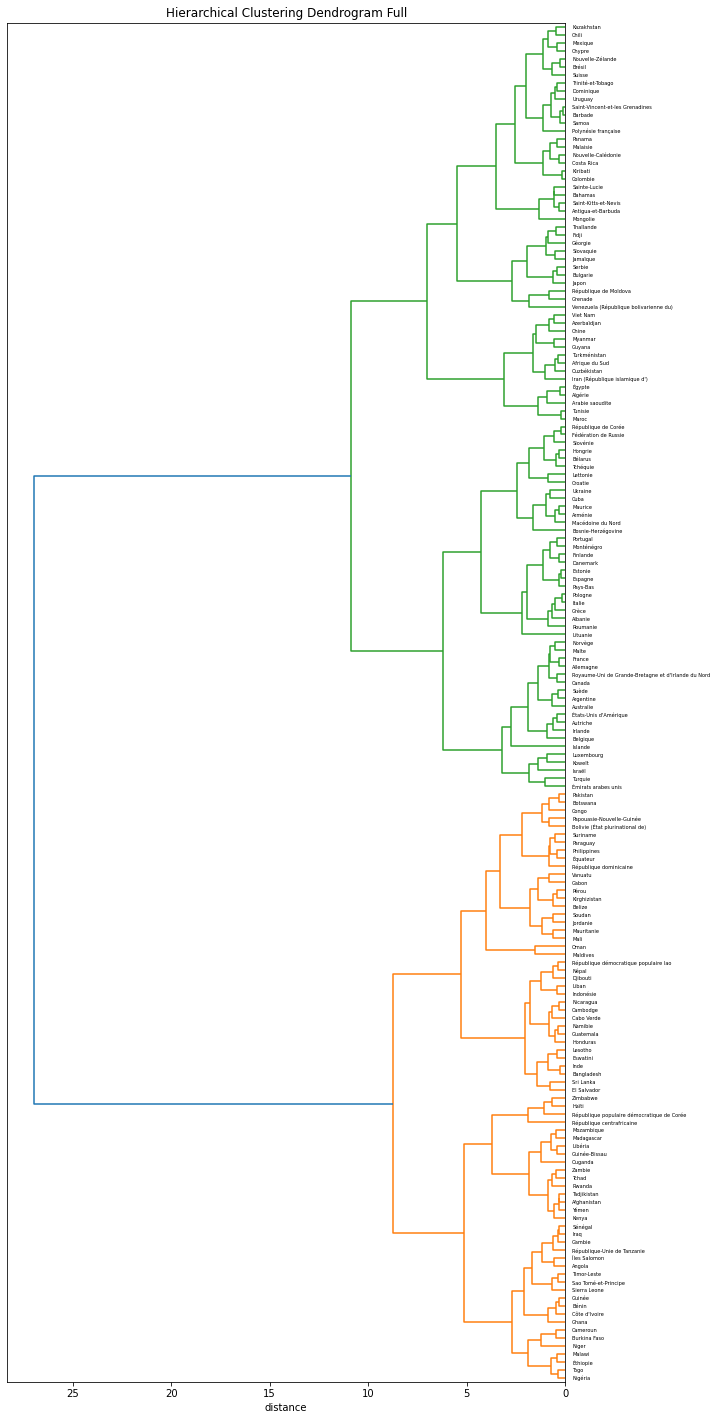

StandardScaler()

In [8]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn import preprocessing

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram Full')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()
    
data_dendogramme = pd.read_csv("data_dendrogramme_init.csv", index_col = 1)
data_dendogramme_clean = data_dendogramme[["croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", "millions_de_kcal_par_habitant_par_an"]]
data_dendogramme_clean.index

# préparation des données pour le clustering
X = data_dendogramme_clean.values
names = list(data_dendogramme_clean.index)

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)



std_scale


In [9]:
clusters = fcluster(Z, 5, criterion='maxclust')

clusters

data_dendogramme_clean["cluster"] = clusters
data_dendogramme_clean["cluster"].value_counts()

# 1 =36 ,   2 = 38,  3=46,   4 = 14,  5 =36


data_dendogramme_clean.groupby(['cluster']).mean()

# data_dendogramme_clean[data_dendogramme_clean["cluster"] == 5]
# data_dendogramme_clean[data_dendogramme_clean["cluster"] == 3]

croissance_pop2015_2018  taux_proteine_animal  \
cluster                                                  
1                       7.264620              0.217257   
2                       5.212546              0.365302   
3                       0.974645              0.566354   
4                       3.861081              0.357178   
5                       1.797182              0.545233   

         kilogramme_proteine_par_habitant_par_an  \
cluster                                            
1                                      20.940557   
2                                      25.439443   
3                                      38.624697   
4                                      33.893379   
5                                      29.869167   

         millions_de_kcal_par_habitant_par_an  
cluster                                        
1                                    1.698548  
2                                    1.908114  
3                                    2.466146  
4                                    2.269596  
5                                    2.083329

# Ajout de données pertinentes
## PIB

In [10]:
data_PIB_noclean = pd.read_csv("FAOSTAT_data_PIB.csv", sep=",") #lire fichier csv

data_PIB = data_PIB_noclean[(data_PIB_noclean["Code année"] == 2019) & (data_PIB_noclean["Code zone"] <= 999)]

data_PIB_clean = data_PIB[(data_PIB["Zone"] != "Chine, Taiwan Province de") & (data_PIB["Zone"] != "Chine, continentale") & (data_PIB["Zone"] != "Chine - RAS de Macao") & (data_PIB["Zone"] != "Chine - RAS de Hong-Kong")]
data_PIB_clean2 = data_PIB_clean[["Zone", "Valeur"]].rename(columns = {"Valeur" : "PIB_par_habitant"})
data_PIB_clean2

Zone  PIB_par_habitant
17                      Afghanistan            2202.3
37                   Afrique du Sud           12481.8
57                          Albanie           13961.8
77                          Algérie           11349.7
97                        Allemagne           53815.4
...                             ...               ...
3650                       Viet Nam            8041.2
3670                         Zambie            3479.5
3690                       Zimbabwe            2835.9
3810  Afrique du Nord (Soudan Excl)           10949.6
3870          Afrique subsaharienne            3841.7

[177 rows x 2 columns]

## Production de poulet mondial

In [11]:
data_production_poulet = pd.read_csv("FAOSTAT_data_production_poulet.csv", sep=",") #lire fichier csv
poulet_mondial_by_annee = data_production_poulet.pivot_table("Valeur", index = "Année", aggfunc = "sum").reset_index()[0:][0:]
poulet_mondial_by_annee.head()


Année     Valeur
0   1961  3906217.0
1   1962  4048266.0
2   1963  4162664.0
3   1964  4230747.0
4   1965  4349175.0

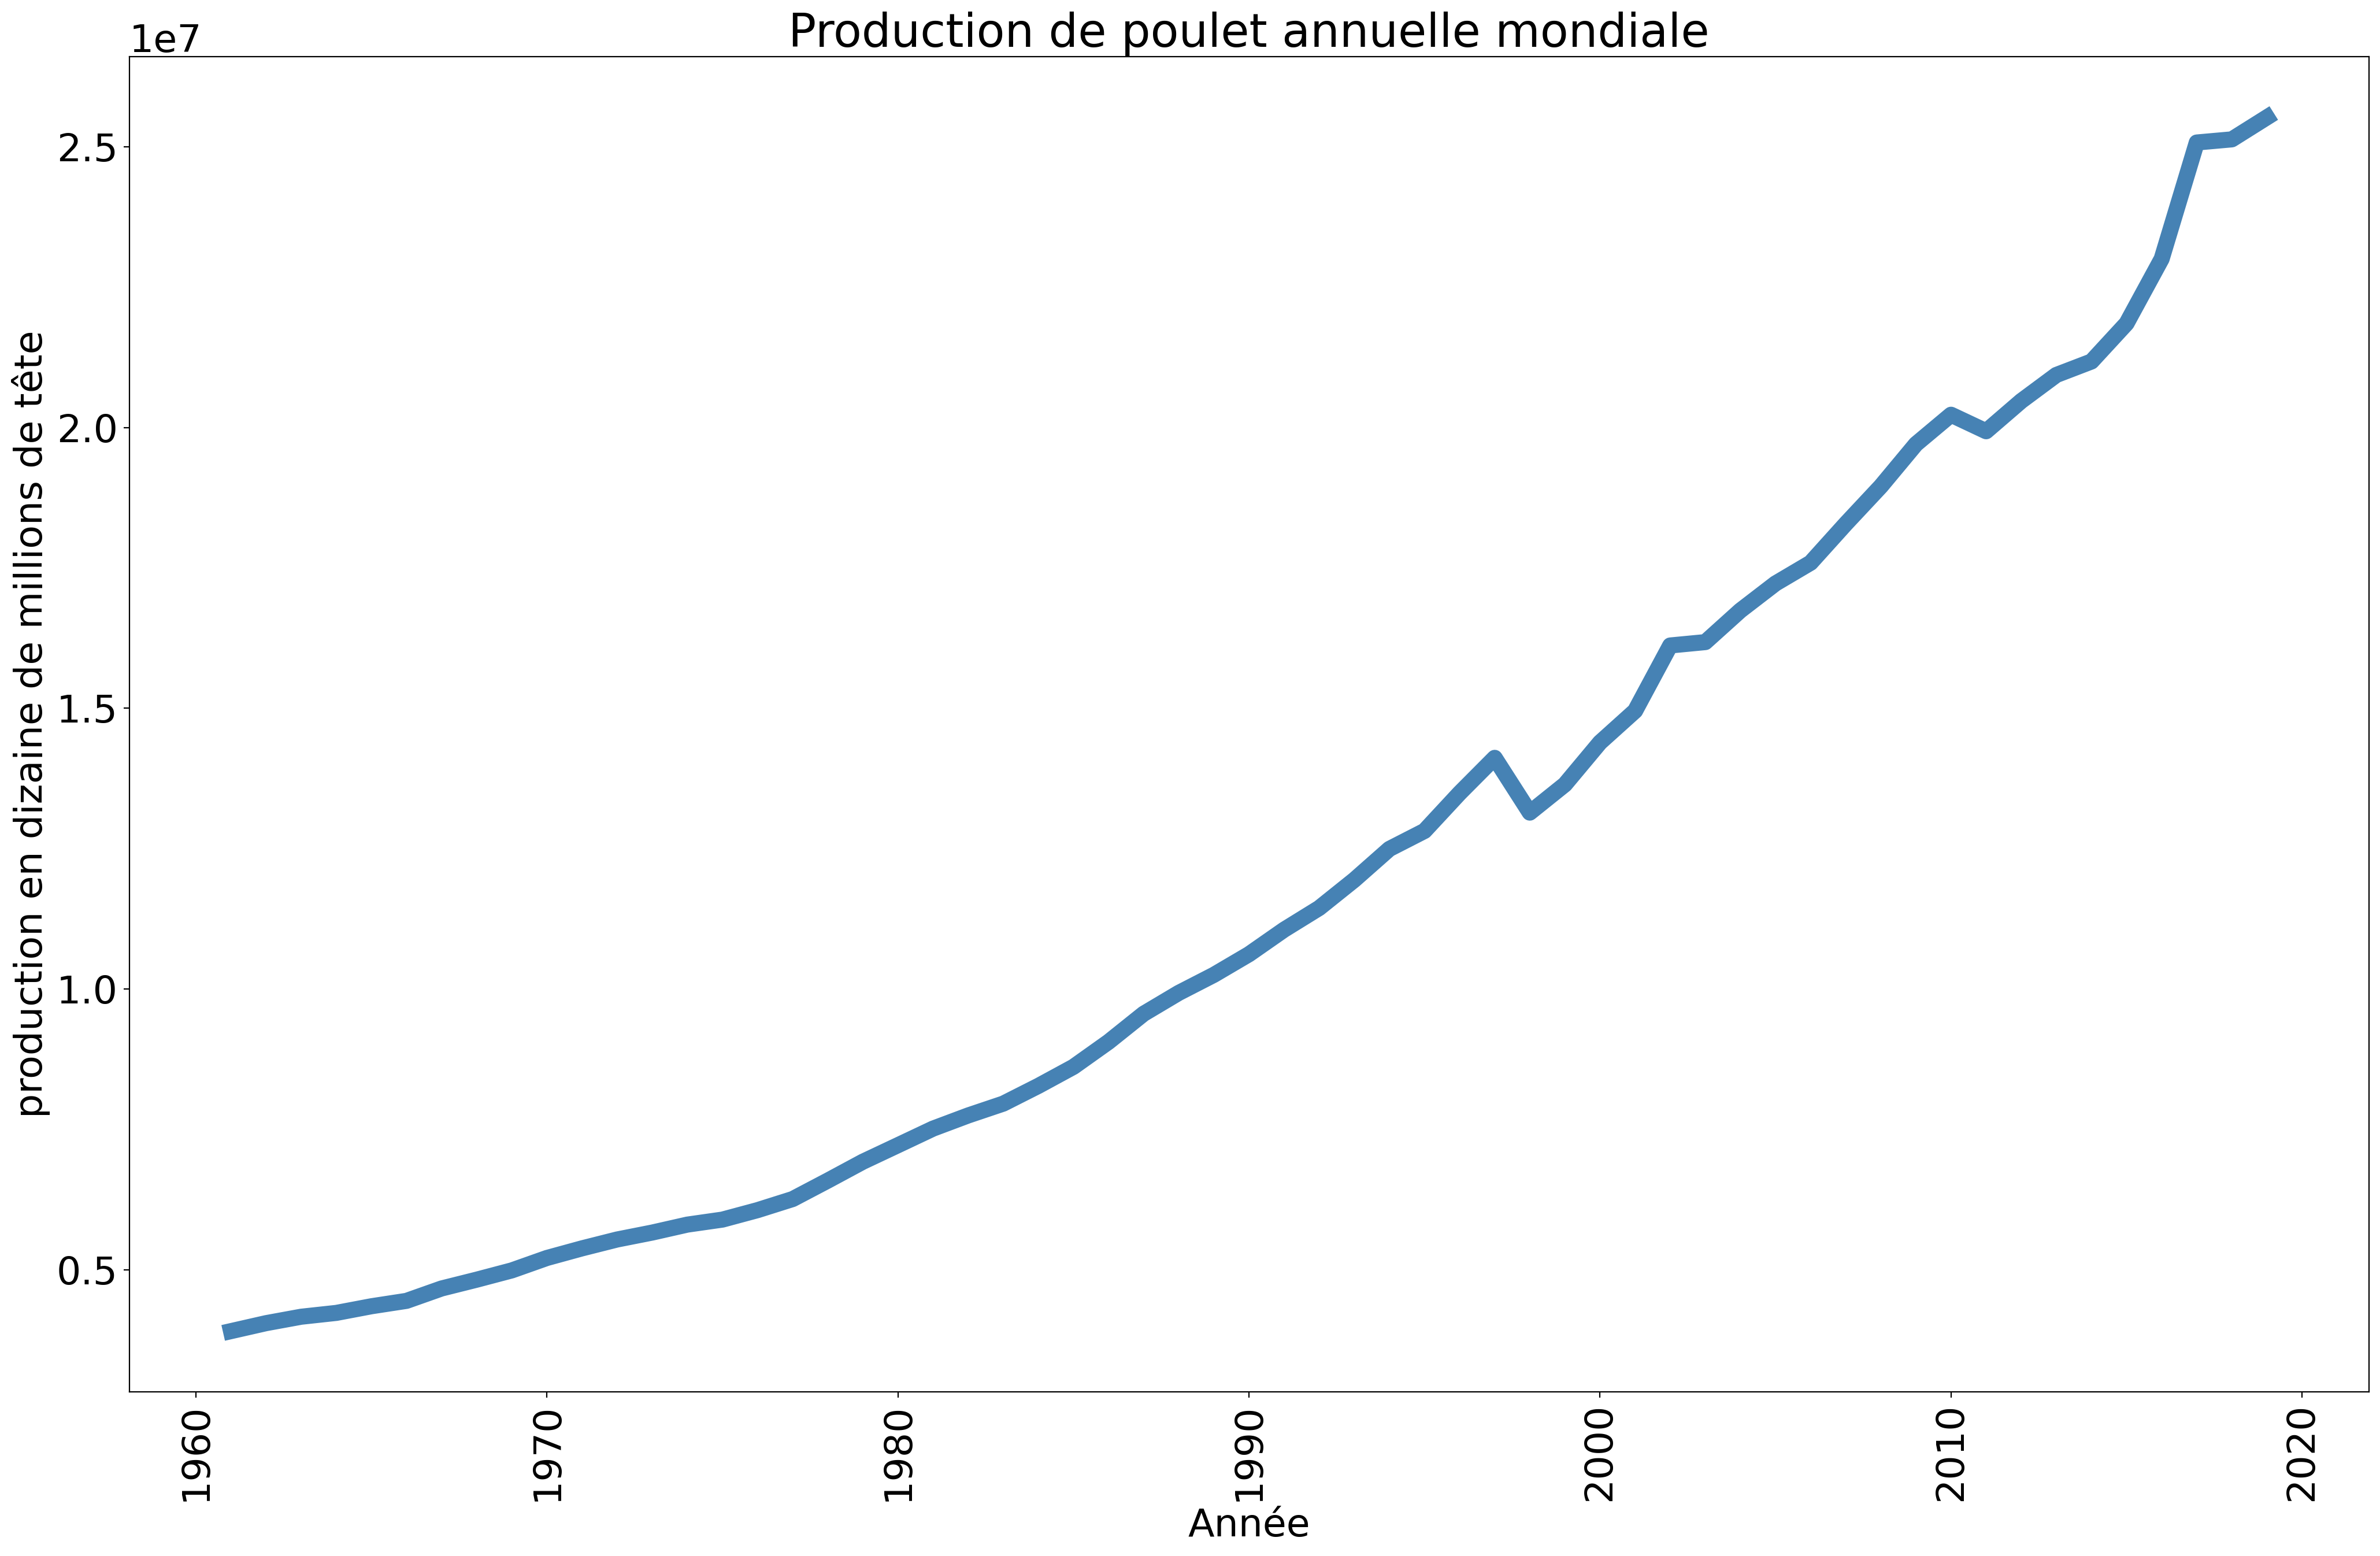

In [12]:
plt.style.use('default')
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(25,15), dpi=200)

sns.lineplot(x=poulet_mondial_by_annee["Année"], y= poulet_mondial_by_annee["Valeur"], 
            data=poulet_mondial_by_annee,
            color='steelblue', linewidth=10)
plt.xticks(rotation=90)
plt.title("Production de poulet annuelle mondiale")
plt.ylabel("production en dizaine de millions de tête")
plt.xlabel("Année")
plt.savefig('./Graph/prod_poulet_mondial.png')
plt.show()


## croissance de la production de poulet par pays entre 2009 et 2019

In [13]:
import_poulet = data[(data["Code Élément"] == 5611)  & (data["Année"] == 2018) & (data["Code Produit"] == 2734)]
import_poulet_2018_clean = import_poulet[["Code zone", "Zone", "Valeur"]].rename(columns= {"Valeur" : "Import2018_en_milliers_de_tonnes"})

consomation_poulet = data[(data["Code Élément"] == 5301)  & (data["Année"] == 2018) & (data["Code Produit"] == 2734)]
consomation_poulet_2018_clean = consomation_poulet[["Code zone", "Zone", "Valeur"]].rename(columns= {"Valeur" : "Consommation2018_en_milliers_de_tonnes"})


## Ratio de l'importation de vollaille par rapport à sa disponibilité total

In [14]:
ratio_import_conso_poulet_2018 = import_poulet_2018_clean.merge(consomation_poulet_2018_clean, on = ["Code zone", "Zone"])

ratio_import_conso_poulet_2018["ratio_import_conso"] = ratio_import_conso_poulet_2018["Import2018_en_milliers_de_tonnes"] / ratio_import_conso_poulet_2018["Consommation2018_en_milliers_de_tonnes"]

ratio_import_conso_poulet_2018_clean = ratio_import_conso_poulet_2018.sort_values(by = "Zone", ascending = True).drop(columns=['Import2018_en_milliers_de_tonnes', 'Consommation2018_en_milliers_de_tonnes', "Code zone"])

ratio_import_conso_poulet_2018_clean

data_recap = data_dendogramme_clean.reset_index()

recap_data = ratio_import_conso_poulet_2018_clean.merge(data_recap, on = "Zone").merge(data_PIB_clean2, on = ["Zone"])

retained_data = recap_data[["Zone", "ratio_import_conso", "PIB_par_habitant", "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an","millions_de_kcal_par_habitant_par_an", "cluster"]].set_index("Zone")

import_poulet2015_2018 =data[(data["Code Élément"] == 5611)  & ((data["Année"] == 2018) | (data["Année"] == 2015)) & (data["Code Produit"] == 2734)]

import_poulet2015_2018

Code zone            Zone  Code Élément                  Élément  \
795             2     Afghanistan          5611  Importations - Quantité   
796             2     Afghanistan          5611  Importations - Quantité   
1742          202  Afrique du Sud          5611  Importations - Quantité   
1743          202  Afrique du Sud          5611  Importations - Quantité   
2611            3         Albanie          5611  Importations - Quantité   
...           ...             ...           ...                      ...   
167688        249           Yémen          5611  Importations - Quantité   
168753        251          Zambie          5611  Importations - Quantité   
168754        251          Zambie          5611  Importations - Quantité   
169776        181        Zimbabwe          5611  Importations - Quantité   
169777        181        Zimbabwe          5611  Importations - Quantité   

        Code Produit              Produit  Code année  Année  \
795             2734  Viande de Volailles        2015   2015   
796             2734  Viande de Volailles        2018   2018   
1742            2734  Viande de Volailles        2015   2015   
1743            2734  Viande de Volailles        2018   2018   
2611            2734  Viande de Volailles        2015   2015   
...              ...                  ...         ...    ...   
167688          2734  Viande de Volailles        2018   2018   
168753          2734  Viande de Volailles        2015   2015   
168754          2734  Viande de Volailles        2018   2018   
169776          2734  Viande de Volailles        2015   2015   
169777          2734  Viande de Volailles        2018   2018   

                     Unité  Valeur Symbole  \
795     Milliers de tonnes    43.0      Im   
796     Milliers de tonnes    25.0      Im   
1742    Milliers de tonnes   329.0      Im   
1743    Milliers de tonnes   515.0      Im   
2611    Milliers de tonnes    21.0      Im   
...                    ...     ...     ...   
167688  Milliers de tonnes    96.0      Im   
168753  Milliers de tonnes     7.0      Im   
168754  Milliers de tonnes    11.0      Im   
169776  Milliers de tonnes     8.0      Im   
169777  Milliers de tonnes     4.0      Im   

                                   Description du Symbole  
795     Données de la FAO basées sur une méthodologie ...  
796     Données de la FAO basées sur une méthodologie ...  
1742    Données de la FAO basées sur une méthodologie ...  
1743    Données de la FAO basées sur une méthodologie ...  
2611    Données de la FAO basées sur une méthodologie ...  
...                                                   ...  
167688  Données de la FAO basées sur une méthodologie ...  
168753  Données de la FAO basées sur une méthodologie ...  
168754  Données de la FAO basées sur une méthodologie ...  
169776  Données de la FAO basées sur une méthodologie ...  
169777  Données de la FAO basées sur une méthodologie ...  

[340 rows x 12 columns]

## rassemblement des données dans une Dataframe

In [15]:
dendogramme_Full = retained_data

dendogramme_Full.to_csv(path_or_buf="data_dendrogramme_full.csv") # crée fichier CSV avec Dataframe

dendogramme_Full

ratio_import_conso  PIB_par_habitant  \
Zone                                                          
Afghanistan                      0.471698            2202.3   
Afrique du Sud                   0.231149           12481.8   
Albanie                          0.444444           13961.8   
Algérie                          0.000000           11349.7   
Allemagne                        0.522809           53815.4   
...                                   ...               ...   
Émirats arabes unis              1.004950           67119.1   
Équateur                         0.000000           11375.3   
États-Unis d'Amérique            0.006865           62682.8   
Éthiopie                         0.013333            2219.7   
Îles Salomon                     1.666667            2367.4   

                       croissance_pop2015_2018  taux_proteine_animal  \
Zone                                                                   
Afghanistan                           7.419563              0.194414   
Afrique du Sud                        4.164864              0.427166   
Albanie                              -0.277489              0.533760   
Algérie                               5.920242              0.269222   
Allemagne                             1.608440              0.608940   
...                                        ...                   ...   
Émirats arabes unis                   3.820995              0.458137   
Équateur                              5.104191              0.466181   
États-Unis d'Amérique                 1.900971              0.646857   
Éthiopie                              7.680546              0.098899   
Îles Salomon                          7.656968              0.289290   

                       kilogramme_proteine_par_habitant_par_an  \
Zone                                                             
Afghanistan                                           20.25750   
Afrique du Sud                                        30.79505   
Albanie                                               42.21955   
Algérie                                               33.51430   
Allemagne                                             38.37975   
...                                                        ...   
Émirats arabes unis                                   40.19380   
Équateur                                              24.06810   
États-Unis d'Amérique                                 41.45670   
Éthiopie                                              24.21045   
Îles Salomon                                          19.39245   

                       millions_de_kcal_par_habitant_par_an  cluster  
Zone                                                                  
Afghanistan                                        1.488470        1  
Afrique du Sud                                     2.130505        4  
Albanie                                            2.424695        3  
Algérie                                            2.444405        4  
Allemagne                                          2.599165        3  
...                                                     ...      ...  
Émirats arabes unis                                2.454625        3  
Équateur                                           1.909315        2  
États-Unis d'Amérique                              2.740420        3  
Éthiopie                                           1.684110        1  
Îles Salomon                                       1.746890        1  

[162 rows x 7 columns]

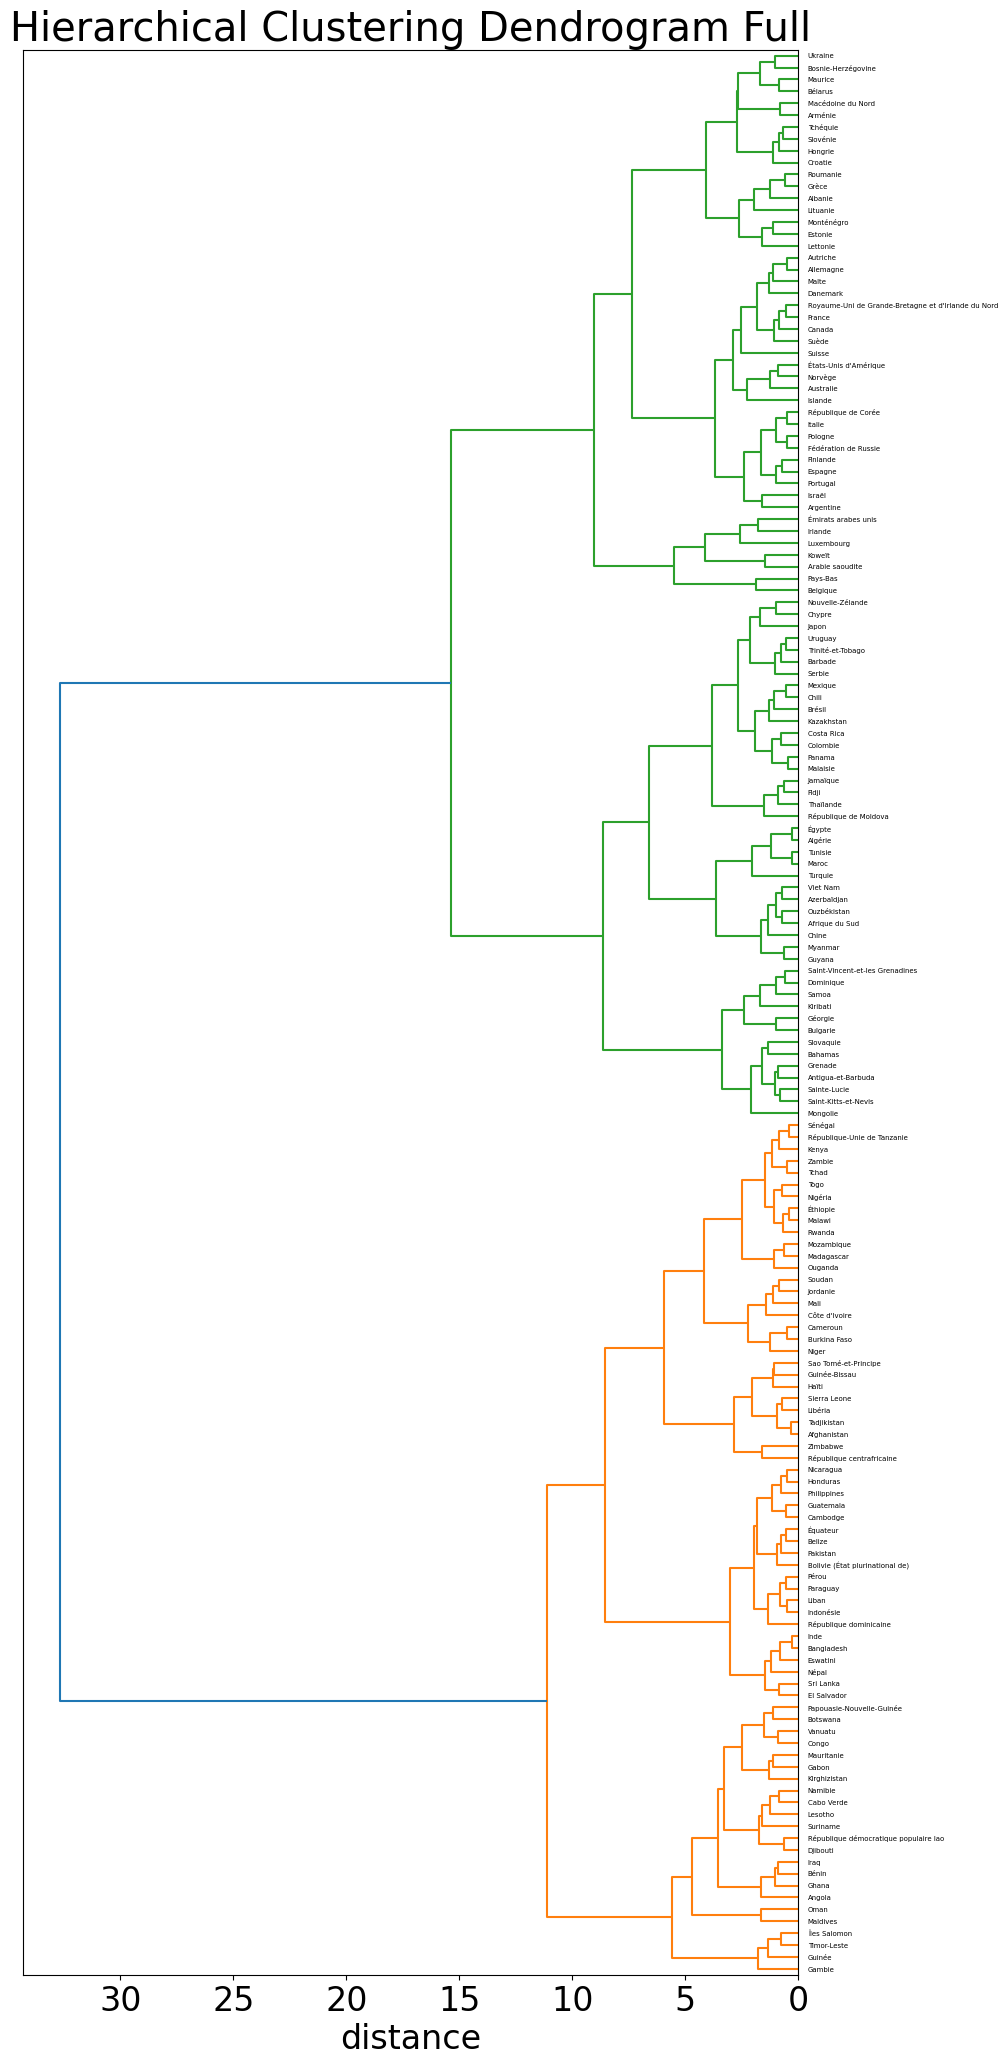

<Figure size 640x480 with 0 Axes>

In [16]:
data_dendogramme_full = pd.read_csv("data_dendrogramme_full.csv", index_col = 0)
data_dendogramme_full.reset_index().iloc[:, [ 1, 2, 3, 4, 5, 6]]

# préparation des données pour le clustering
X = data_dendogramme_full.values
names = list(data_dendogramme_full.index)

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

plt.savefig("Graph_dendrogramme_full.png", format='png', bbox_inches='tight')


In [17]:
clusters = fcluster(Z, 5, criterion='maxclust')

clusters

data_dendogramme_full["cluster"] = clusters
data_dendogramme_full["cluster"].value_counts()

# 1 =36 ,   2 = 38,  3=46,   4 = 14,  5 =36


data_dendogramme_full.groupby(['cluster']).mean()

# data_dendogramme_clean[data_dendogramme_clean["cluster"] == 5]
# data_dendogramme_clean[data_dendogramme_clean["cluster"] == 3]

ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
cluster                                                                  
1                  1.100441       8107.556522                 6.791223   
2                  0.180692       5352.755102                 6.019412   
3                  0.397054      18539.972727                 2.386327   
4                  1.225342      67719.985714                 4.140355   
5                  0.357724      37905.269231                 0.504712   

         taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
cluster                                                                  
1                    0.350936                                24.562278   
2                    0.270410                                22.780916   
3                    0.490790                                31.238691   
4                    0.544025                                38.171700   
5                    0.576568                                38.580874   

         millions_de_kcal_par_habitant_par_an  
cluster                                        
1                                    1.875148  
2                                    1.785006  
3                                    2.144997  
4                                    2.549577  
5                                    2.443946

# Analyse préliminaire en vue de l'ACP
## Nombre de variable et d'observation pour le calcul du % des informations disponible

In [18]:
#dimension
# print(retained_data.shape) # (162, 6)
#nombre d'observations
n = retained_data.iloc[:, [0, 1, 2, 3, 4, 5]].shape[0]
#nombre de variables
p =retained_data.iloc[:, [0, 1, 2, 3, 4, 5]].shape[1]


#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(retained_data.iloc[:, [0, 1, 2, 3, 4, 5]])
# print(Z)


#vérification - librairie numpy que moyenne est nul (au erreur de troncature près) et que l'écart type = 1
import numpy
# #moyenne
# print(numpy.mean(Z,axis=0))
# #écart-type
# print(numpy.std(Z,axis=0,ddof=0))


#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres sélectionné
# print(acp)

#calculs des coordonnées 
coord = acp.fit_transform(Z)
#nombre de composantes calculées
# print(acp.n_components_) # 6


# Variance associé aux axe factoriel
eigval =acp.singular_values_**2/n
print(eigval)
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

print("la 1er composante représente 60% de l'information disponible; avec les 3 première composante nous avons 88% des informations")

[3.61465289 1.06353829 0.64923396 0.36322846 0.22007454 0.08927186]
[0.60244215 0.17725638 0.10820566 0.06053808 0.03667909 0.01487864]
la 1er composante représente 60% de l'information disponible; avec les 3 première composante nous avons 88% des informations


## diagramme de l'éboulis des valeurs propre, et de la Variance expliqué par variable

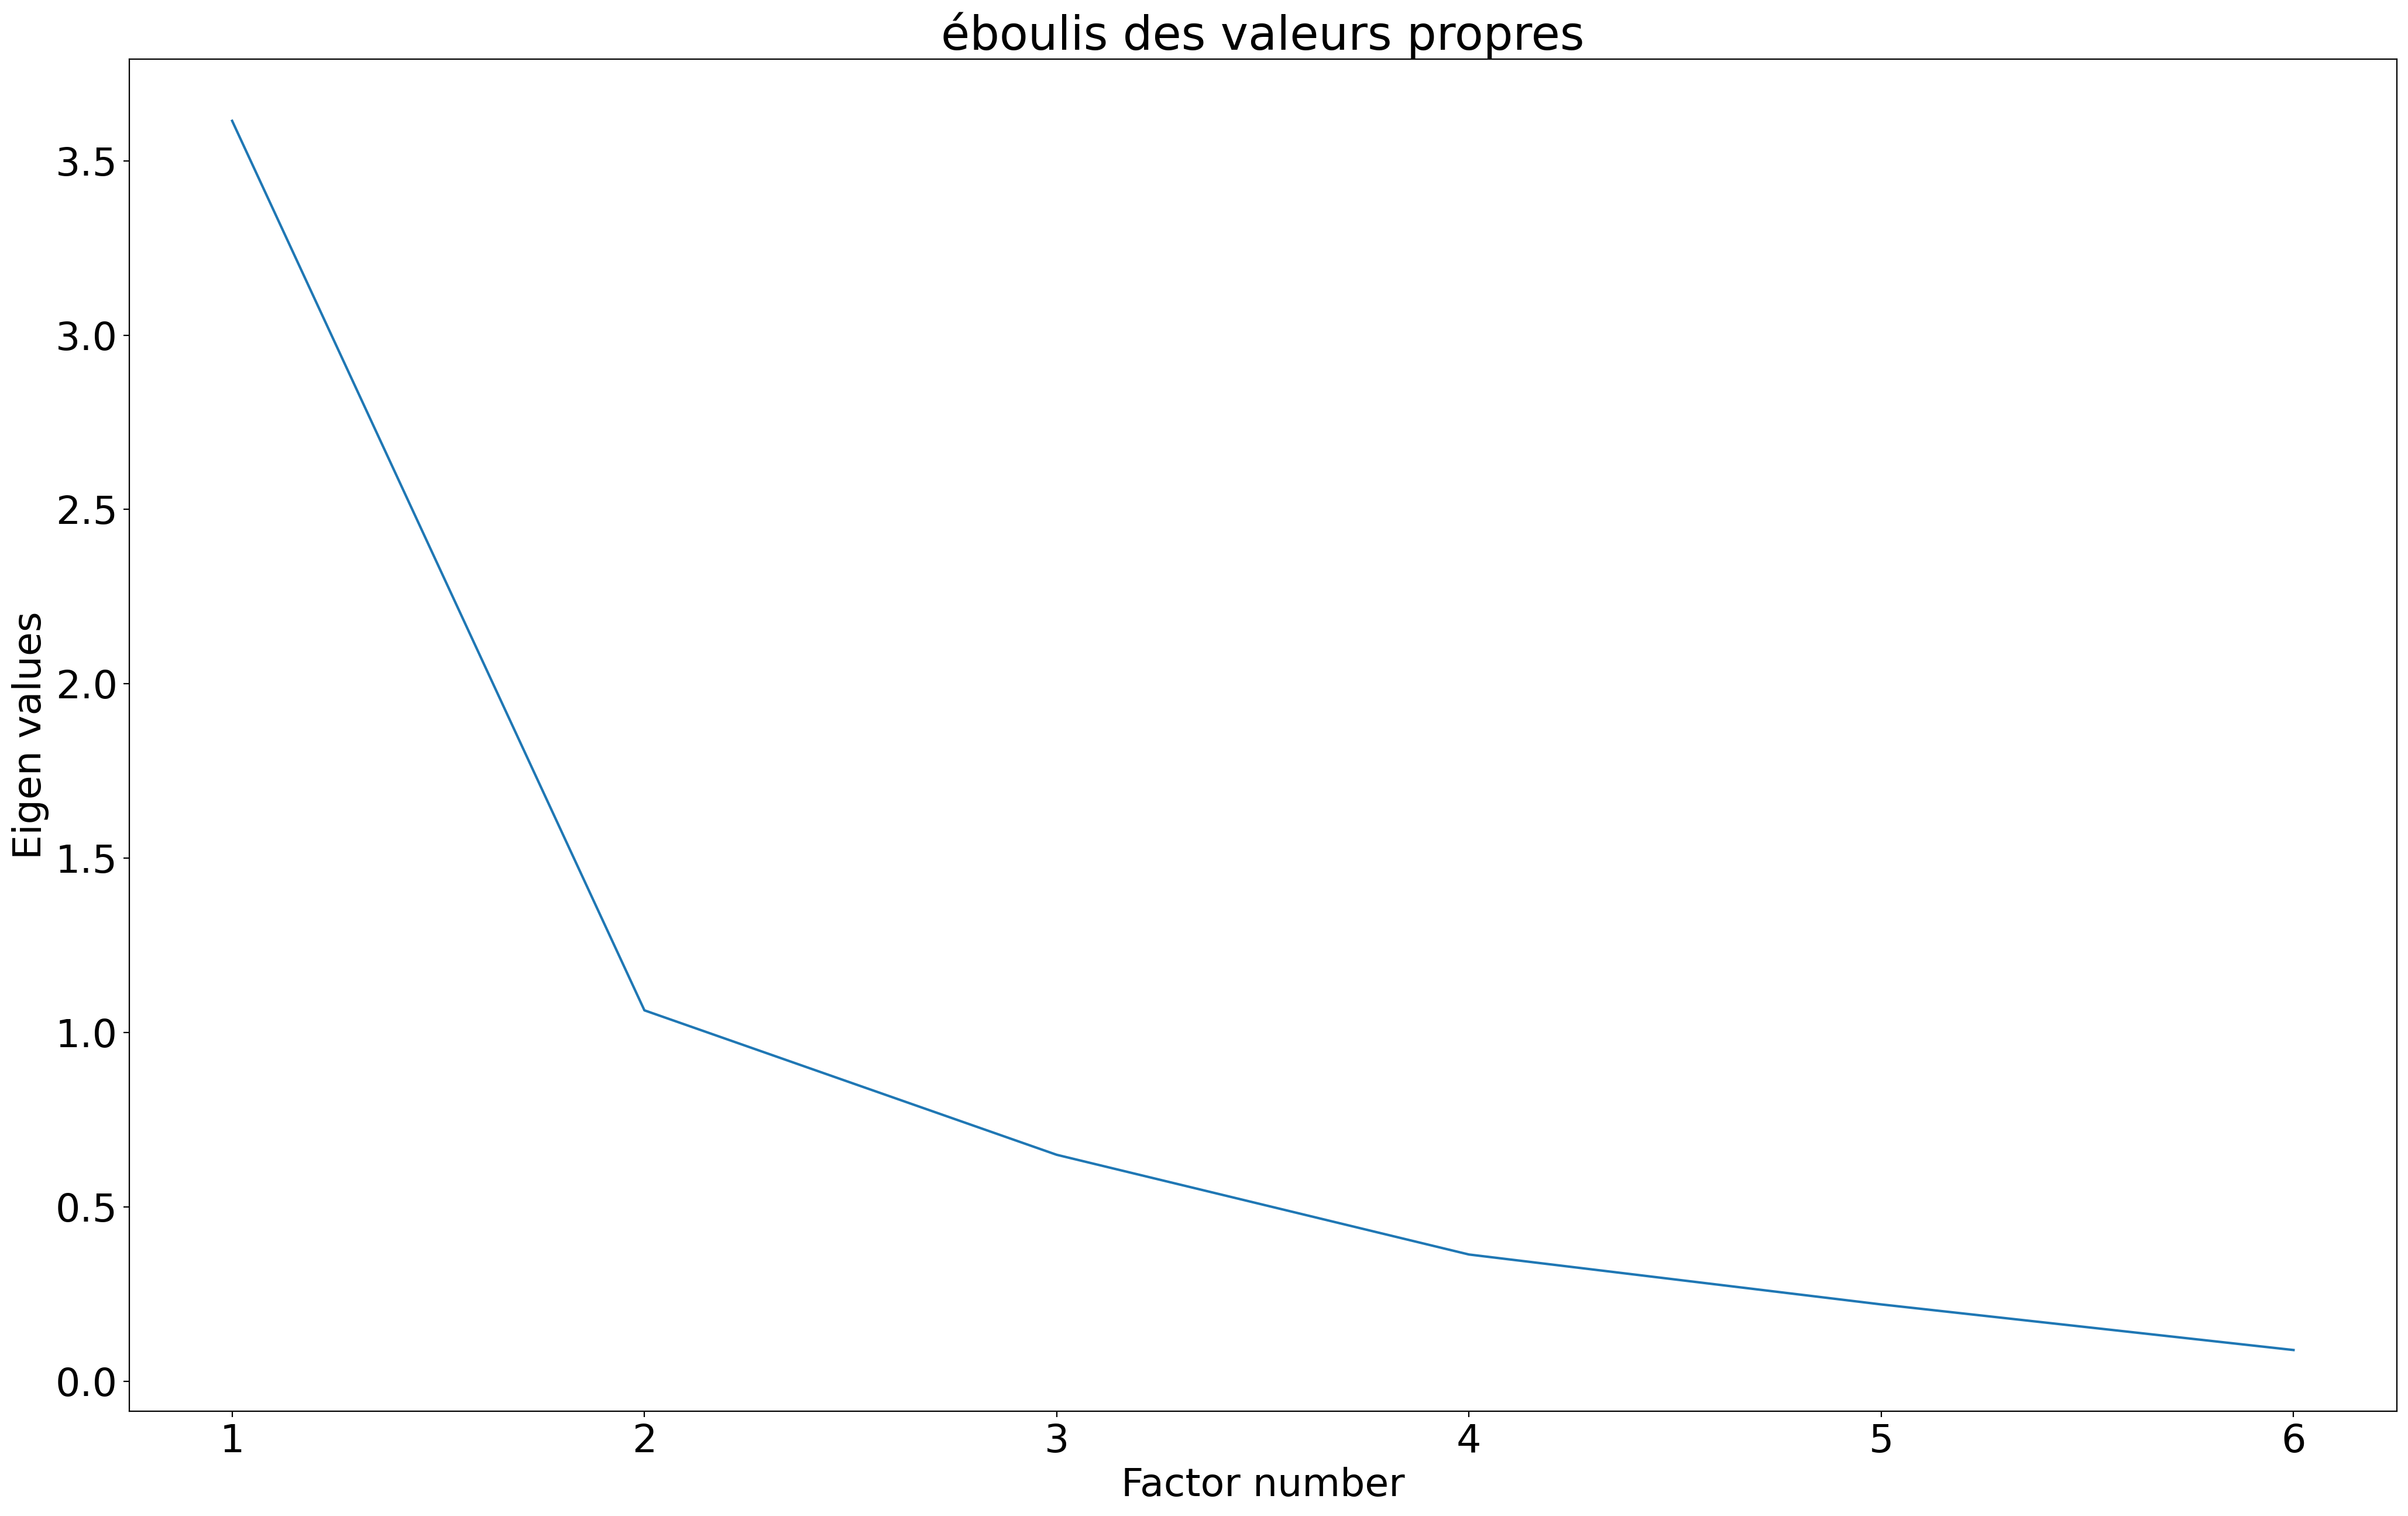

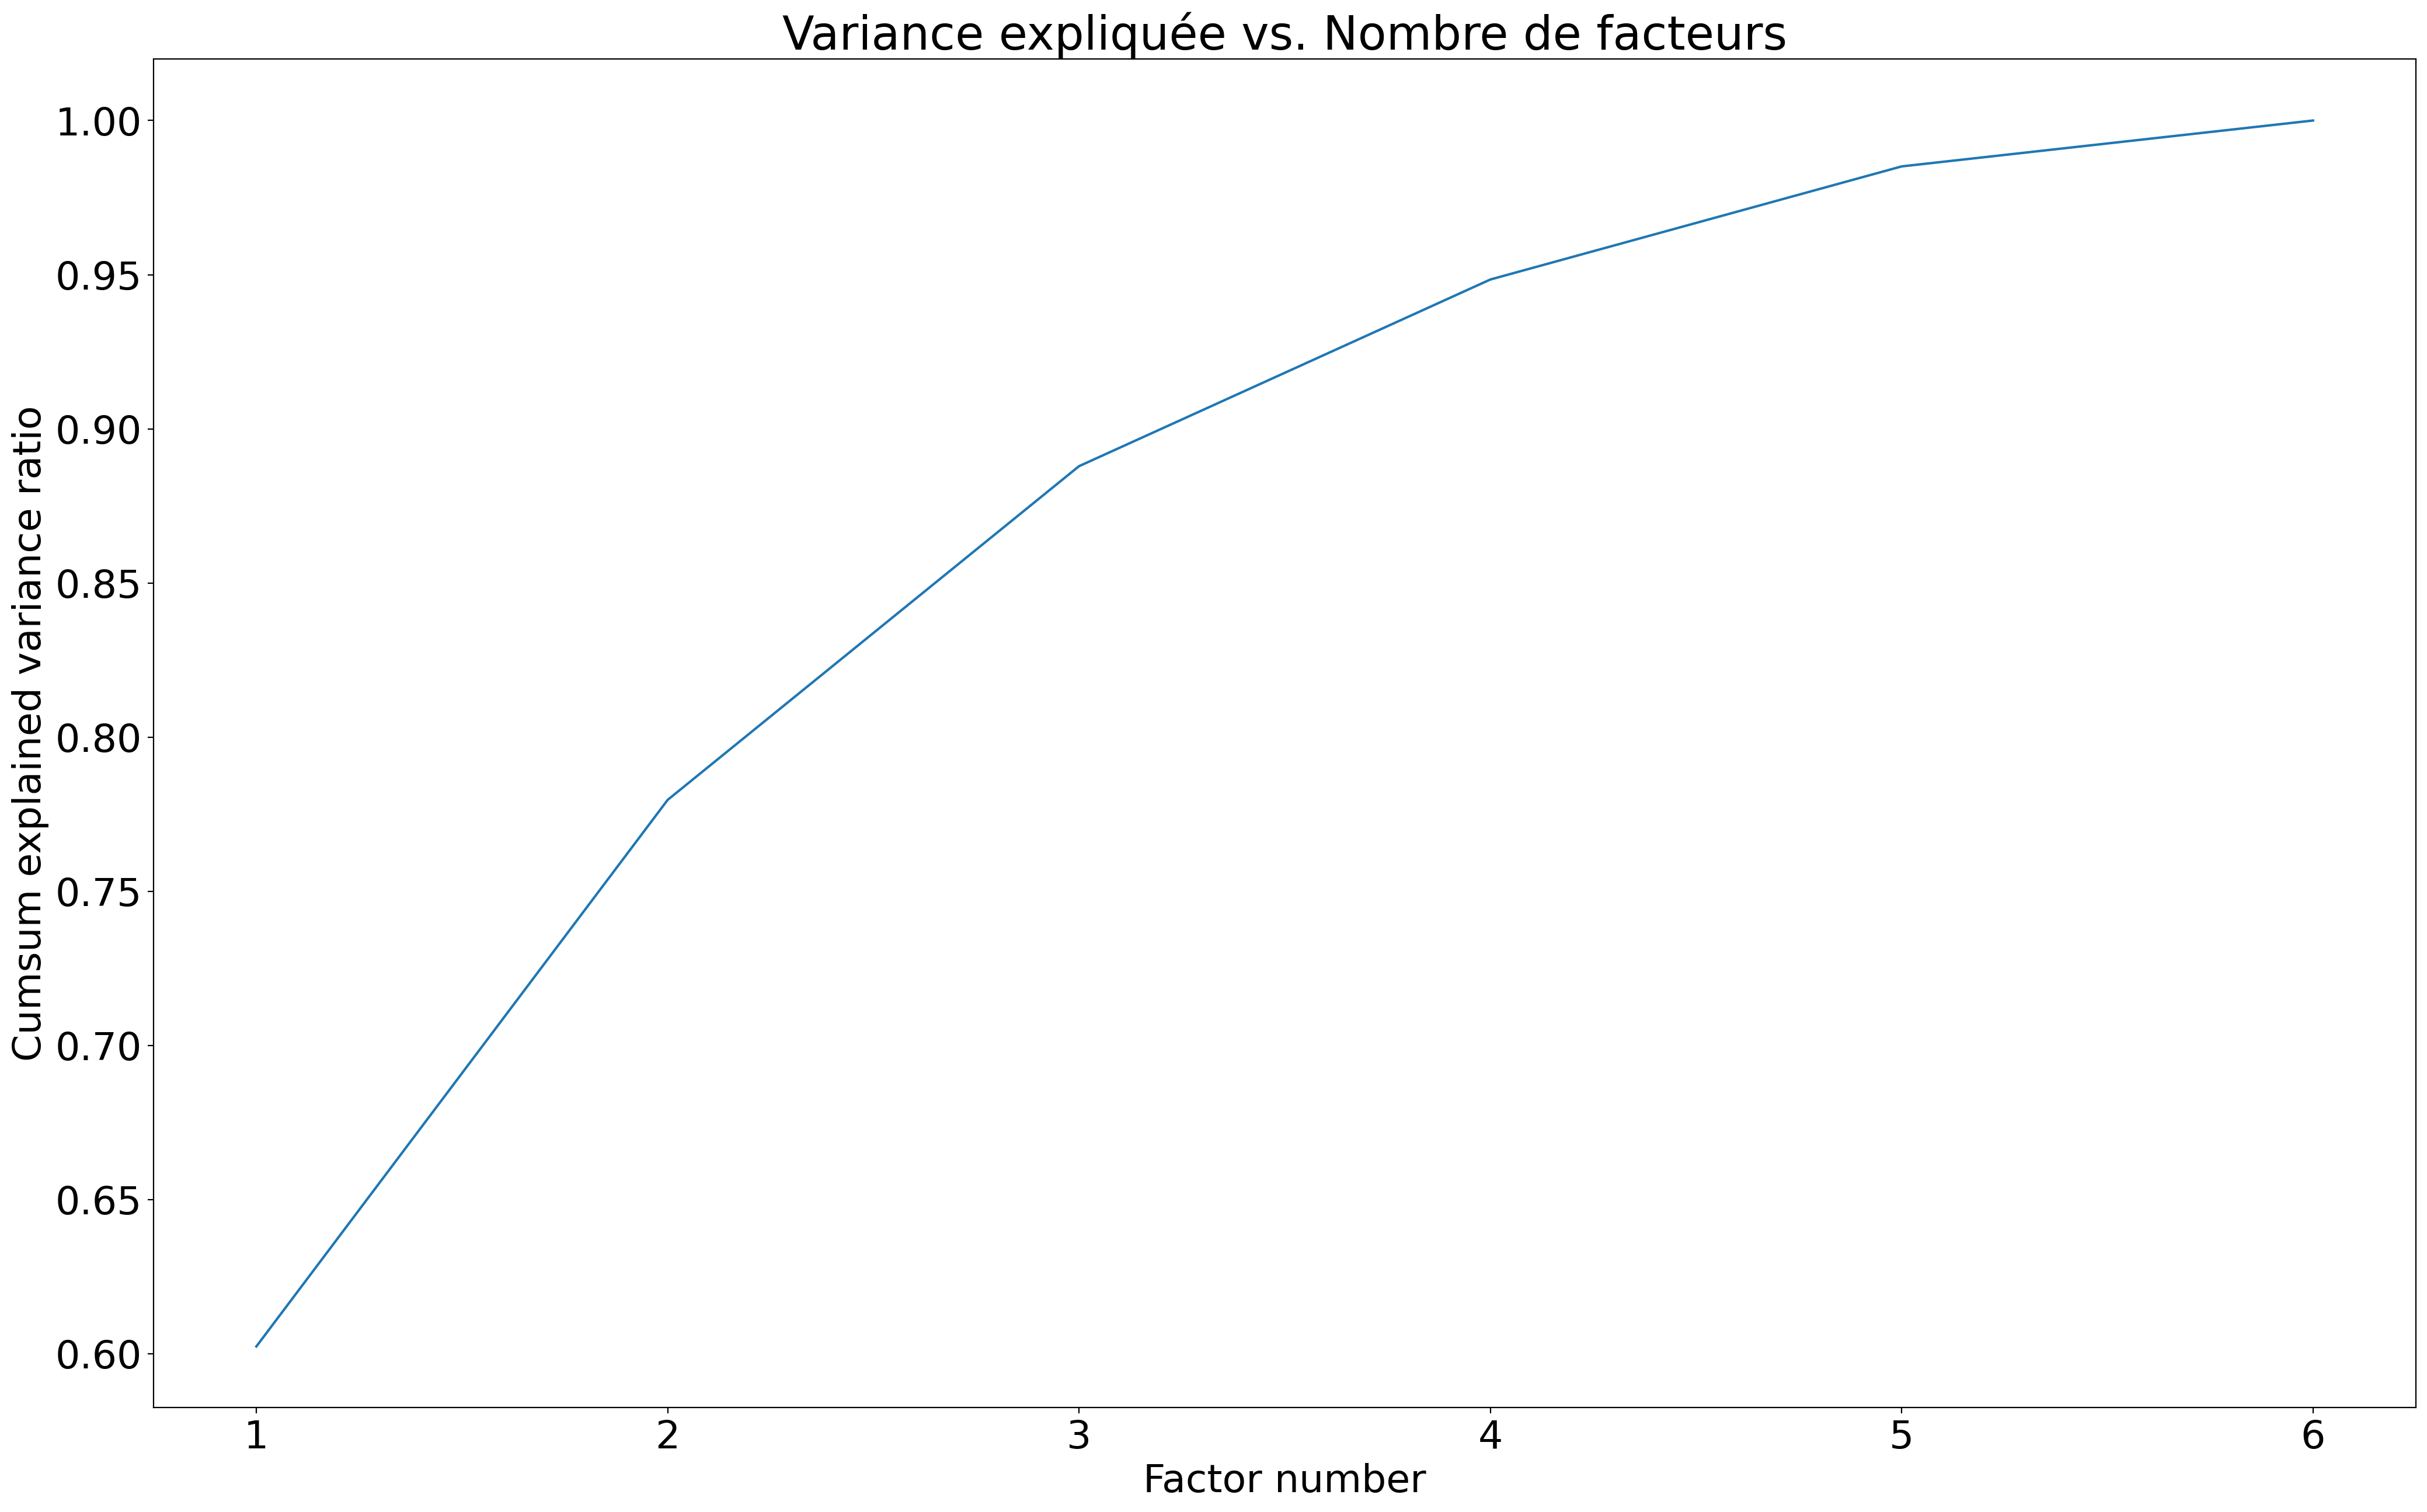

In [19]:


#graph ébouli des valeur propre
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(25,15), dpi=200)
plt.plot(numpy.arange(1,p+1),(acp.singular_values_**2/n))
plt.title("éboulis des valeurs propres")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig("éboulis_des_valeur_propre.png")
plt.show()




#cumul de variance expliquée
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(25,15), dpi=200)
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée vs. Nombre de facteurs")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig("variance_explain.png")
plt.show()




## test des bâtons brisé pour connaitre le nombre de facteur à conserver

In [20]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
display(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

# Avec cette procédure, seul le premier facteur est valide ; Néanmoins, par commodité, nous choisissons K* = 2 pour pouvoir représenter les individus et les
# variables dans le plan.


Val.Propre    Seuils
0    3.614653  2.450000
1    1.063538  1.450000
2    0.649234  0.950000
3    0.363228  0.616667
4    0.220075  0.366667
5    0.089272  0.166667

## Représentation des individus dans les plans factoriels

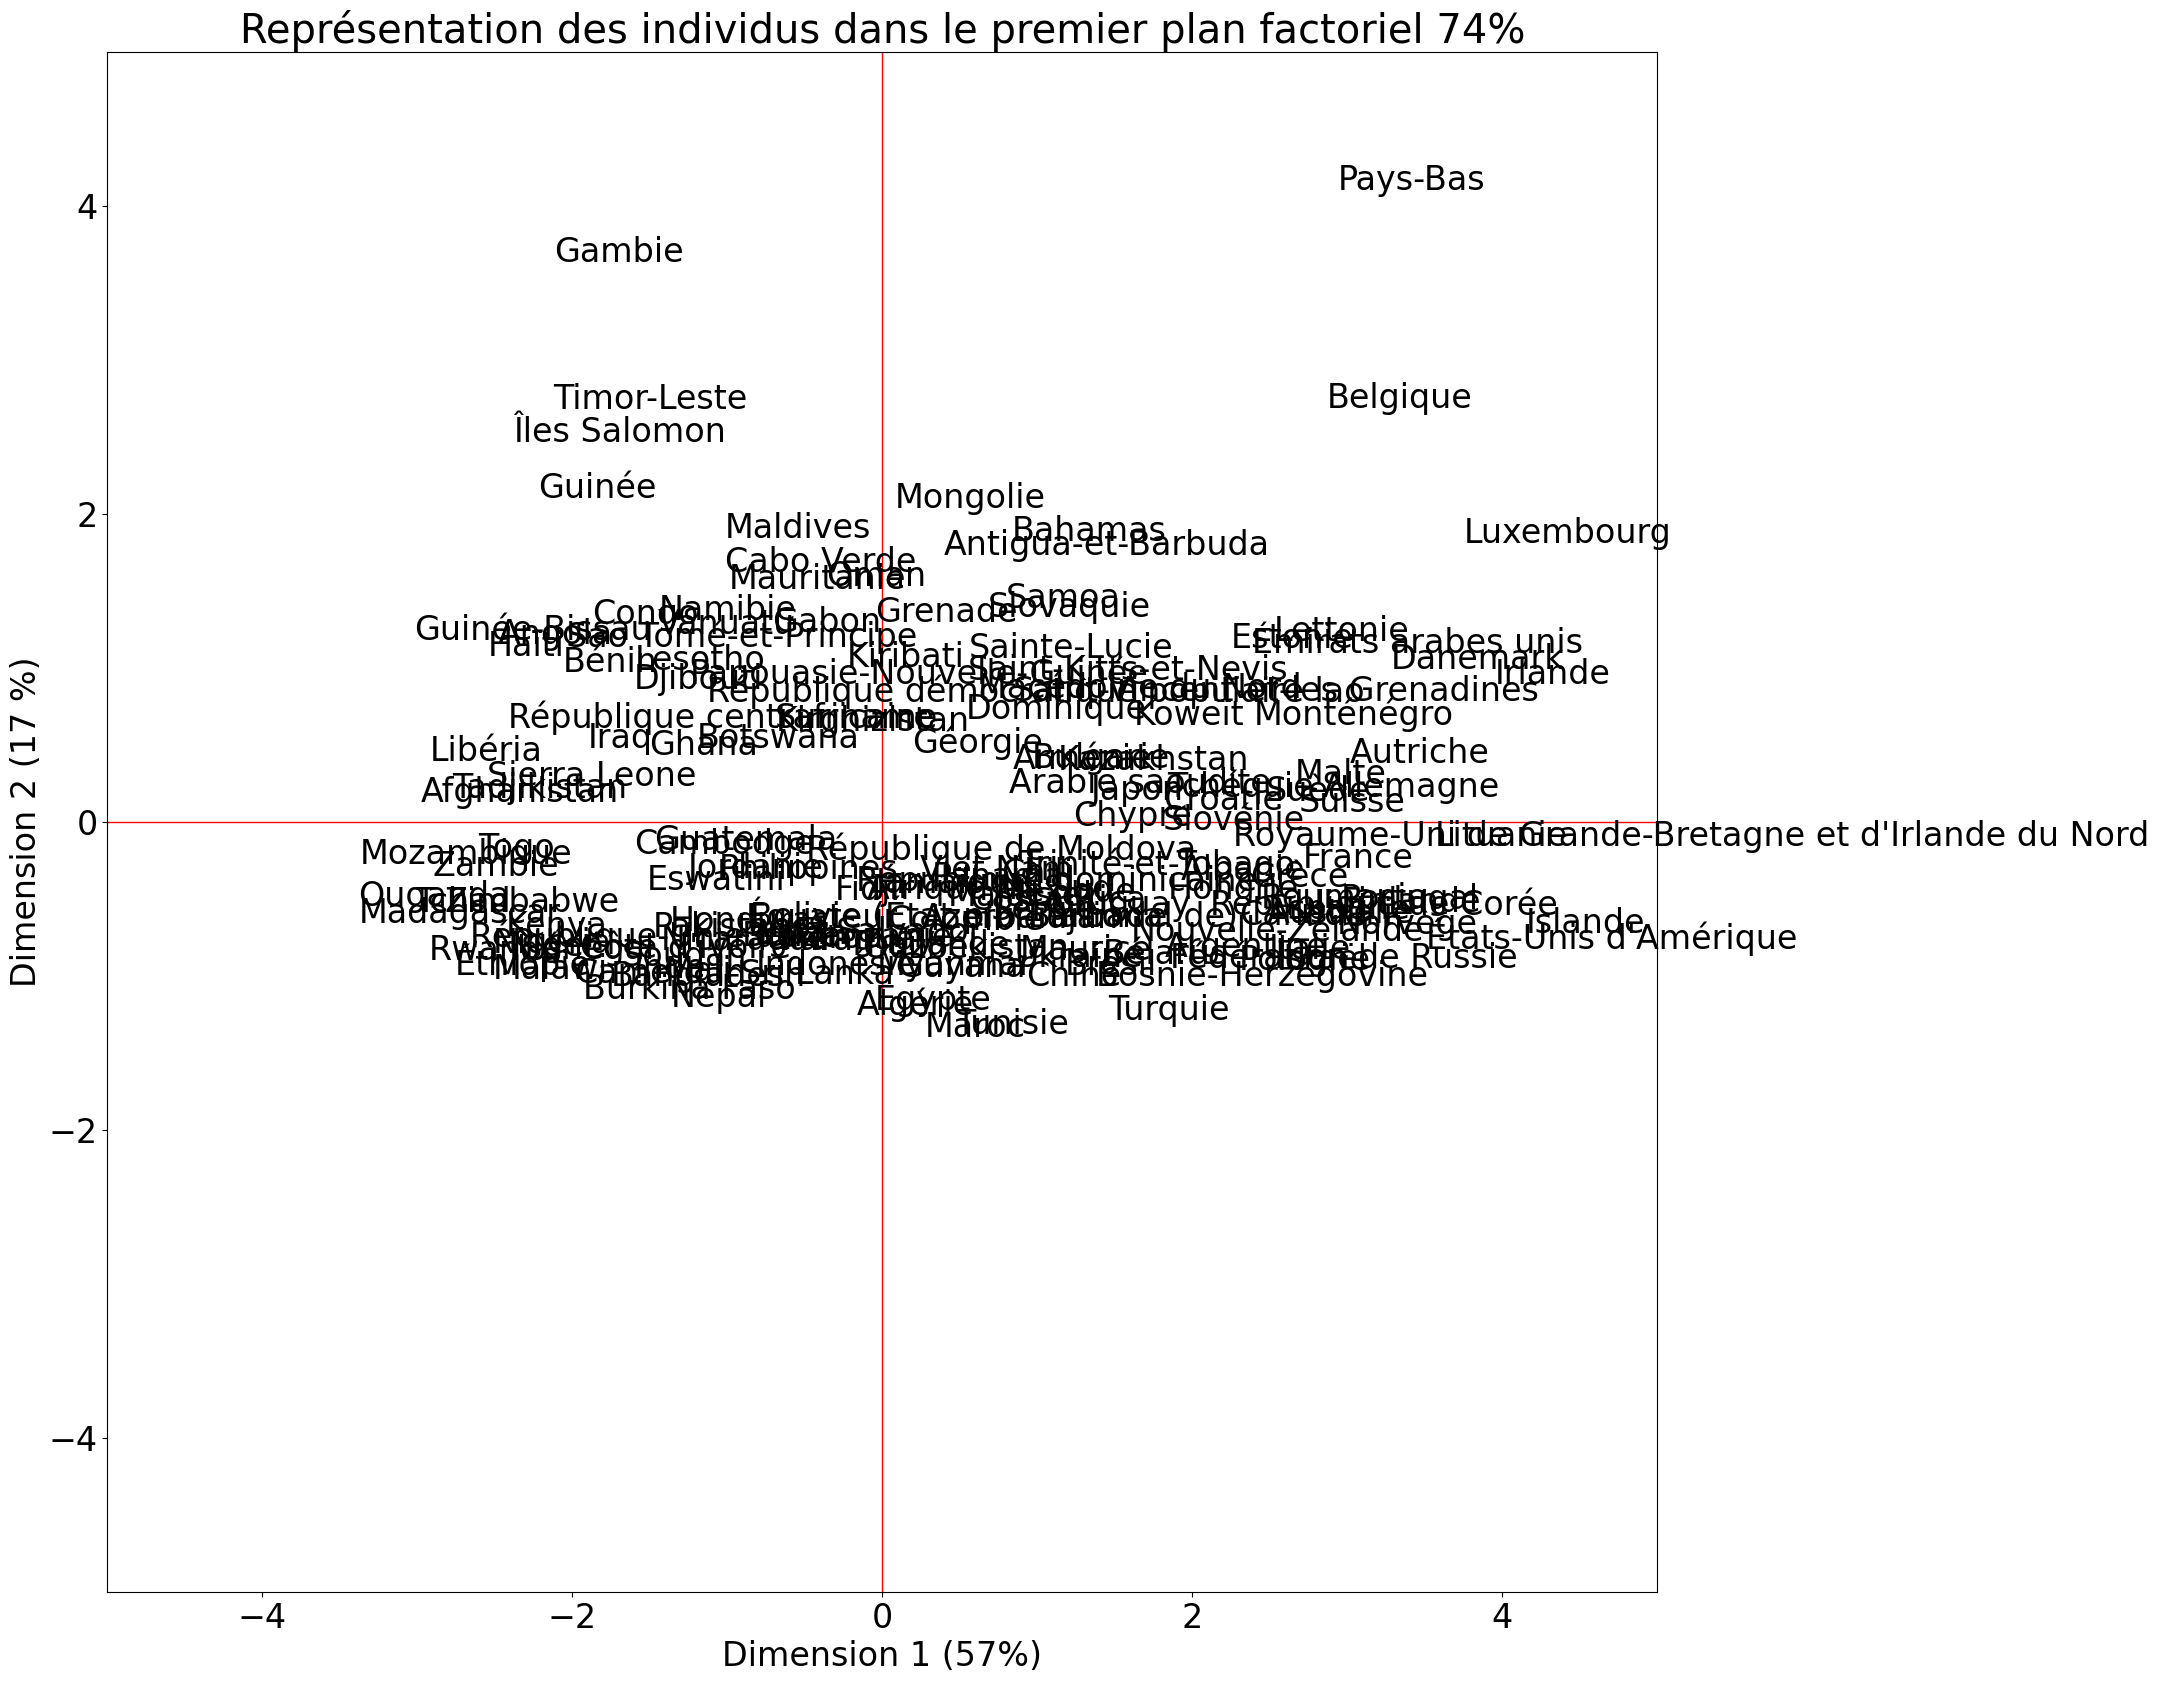

In [21]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(retained_data.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='red',linestyle='-',linewidth=1)
#affichage
plt.title("Représentation des individus dans le premier plan factoriel 74%")
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (17 %)") # idem pour axe Y
plt.show()

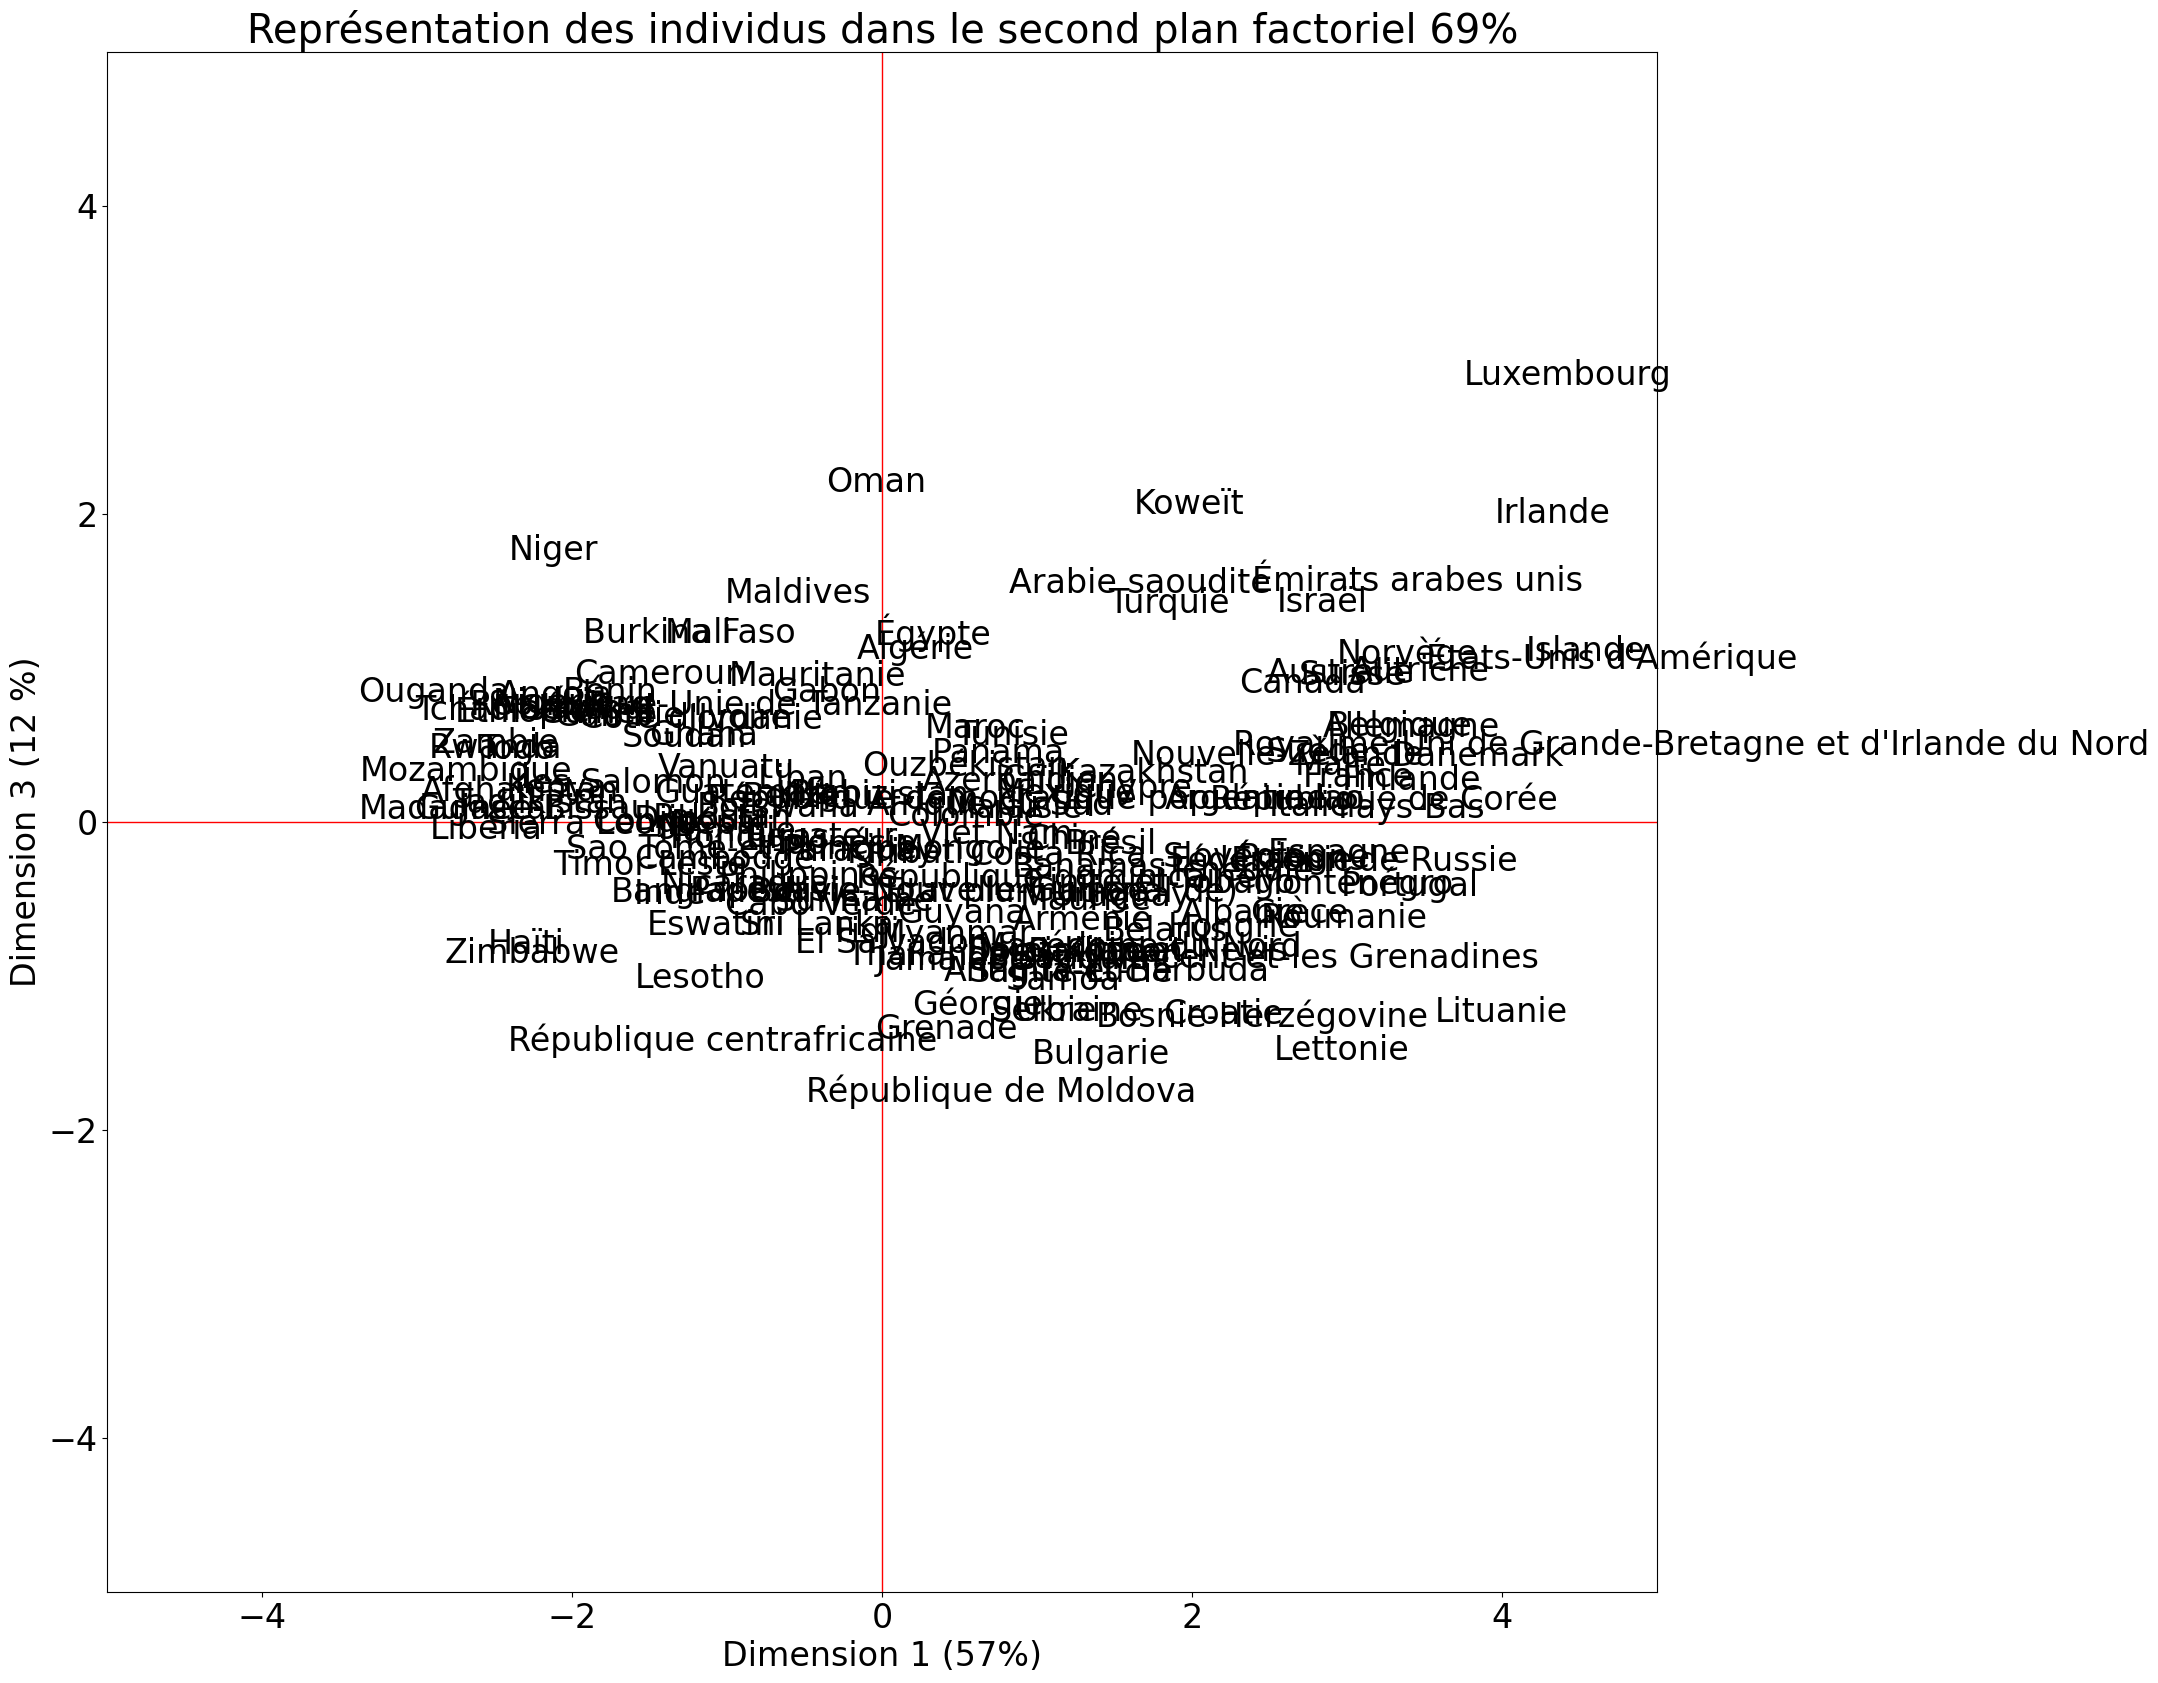

In [22]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(retained_data.index[i],(coord[i,0],coord[i,2]))
#ajouter les axes
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='red',linestyle='-',linewidth=1)
#affichage
plt.title("Représentation des individus dans le second plan factoriel 69%")
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (12 %)") # idem pour axe Y
plt.show()

## Calcul de la qualité de la représentation des informations

In [23]:
# Pour calculer la qualité de la représentation des individus sur les axes, nous devons d’abord calculer les carrés des
# distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale

#contribution des individus dans l'inertie totale 
di = numpy.sum(Z**2,axis=1)
# print(pd.DataFrame({'ID':retained_data.index,'d_i':di}).sort_values(by = "d_i", ascending = False))

#qualité de représentation des individus - COS^2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
# print(pd.DataFrame({'id':retained_data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

#vérification pour voir si il y a une erreur ;  en théorie pour chaque individu, la somme des COS² sur l’ensemble des facteurs est égale à 1.
# print(numpy.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

# print(pd.DataFrame({'id':retained_data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}).sort_values(by = "CTR_1", ascending = False))

#vérification si ok = 1 partout)
# print(numpy.sum(ctr,axis=0))

#le champ components_ de l'objet ACP
# print(acp.components_) # les facteurs sont en ligne, les variables en colonne


#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # sqrt racine² inverse de square qui est ²

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for i in range(p):
 corvar[:,i] = acp.components_[i,:] * sqrt_eigval[i]

#afficher la matrice des corrélations variables x facteurs
print(corvar) # Les variables sont maintenant en ligne, les facteurs en colonne :

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':retained_data.drop(columns = "cluster").columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))
# retained_data.drop(columns = "cluster").columns


[[ 0.02752868  0.9828814  -0.02531291 -0.17972064  0.01352434  0.00794743]
 [ 0.8491481   0.12498257  0.31116753  0.26597729  0.30778897  0.03199469]
 [-0.71224692  0.10840635  0.6620428   0.11427961 -0.1706714  -0.02152127]
 [ 0.85487272  0.19749378 -0.18022571  0.35076387 -0.26401287 -0.07049432]
 [ 0.92390989 -0.10898191  0.17298093 -0.18535185 -0.16201232  0.20973259]
 [ 0.89505868 -0.13866871  0.22597257 -0.29955734 -0.00883598 -0.19688745]]
                                        id     COR_1     COR_2
0                       ratio_import_conso  0.027529  0.982881
1                         PIB_par_habitant  0.849148  0.124983
2                  croissance_pop2015_2018 -0.712247  0.108406
3                     taux_proteine_animal  0.854873  0.197494
4  kilogramme_proteine_par_habitant_par_an  0.923910 -0.108982
5     millions_de_kcal_par_habitant_par_an  0.895059 -0.138669


In [24]:
cos2

array([[9.56103638e-01, 1.90583617e-03, 2.08610732e-03, 6.30955170e-03,
        9.11104627e-03, 2.44838202e-02],
       [2.49464801e-02, 6.14565776e-01, 4.59698638e-03, 3.07635170e-02,
        3.17411853e-01, 7.71538792e-03],
       [6.26535309e-01, 2.40959973e-02, 7.21594553e-02, 1.65311447e-01,
        8.71085264e-02, 2.47892645e-02],
       [6.89027098e-03, 3.99070906e-01, 2.81935606e-01, 2.86965626e-01,
        9.06730437e-03, 1.60702869e-02],
       [9.39090970e-01, 2.95542132e-03, 3.54649602e-02, 2.83044614e-03,
        1.20014419e-02, 7.65676015e-03],
       [7.48637085e-01, 1.61319788e-01, 6.95469424e-02, 8.94413126e-03,
        2.55664087e-03, 8.99541275e-03],
       [2.94736124e-02, 5.73452624e-01, 2.02415405e-01, 1.35801359e-01,
        3.73402541e-02, 2.15167454e-02],
       [1.86188269e-01, 9.64150165e-03, 6.22021621e-01, 8.49111511e-04,
        1.59284473e-01, 2.20150245e-02],
       [6.22291160e-01, 1.44843253e-01, 1.40392707e-03, 8.74736585e-03,
        2.20027260e-01, 

In [25]:
#t calculer la qualité de représentation des variables en montant la corrélation au carré :
cos2var = corvar**2
print(pd.DataFrame({'id':retained_data.drop(columns = "cluster").columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}))

# La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche pour tout les axes, mais seul les deux premiers sont intéréssant pour un représentation 2D
print(pd.DataFrame({'id':retained_data.drop(columns = "cluster").columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))



                                        id    COS2_1    COS2_2    COS2_3  \
0                       ratio_import_conso  0.000758  0.966056  0.000641   
1                         PIB_par_habitant  0.721052  0.015621  0.096825   
2                  croissance_pop2015_2018  0.507296  0.011752  0.438301   
3                     taux_proteine_animal  0.730807  0.039004  0.032481   
4  kilogramme_proteine_par_habitant_par_an  0.853609  0.011877  0.029922   
5     millions_de_kcal_par_habitant_par_an  0.801130  0.019229  0.051064   

     COS2_4    COS2_5    COS2_6  
0  0.032300  0.000183  0.000063  
1  0.070744  0.094734  0.001024  
2  0.013060  0.029129  0.000463  
3  0.123035  0.069703  0.004969  
4  0.034355  0.026248  0.043988  
5  0.089735  0.000078  0.038765  
                                        id     CTR_1     CTR_2     CTR_3  \
0                       ratio_import_conso  0.000210  0.908341  0.000987   
1                         PIB_par_habitant  0.199480  0.014687  0.149138   
2

## Réalisation d'un diagramme d'influence pour determiner les outliers

#### Je vais utiliser une ACP : tous les pays doivent avoir le même poids.Il faut donc enlever les pays qui ont une plus grande influence que les autres.Pour cela, j'utilise un graphique d'influence avec une variable de contrôle qui va étalonner l'influence des pays. J'ai choisi le ratio importation/consommation de poulet qui me semble un bon étalon puisqu'on veut exporter notre production dans les pays qui en ont le plus besoin.¶
L'effet de levier est une mesure de la distance qui sépare les valeurs de la variable indépendante de celles des autres observations.

La distance de Cook mesure l'effet de la suppression d'une valeur dont le résidu est important, impliquant un impact plus important dans la regression.

Les résidus studentisés sont les résidus divisé par l'écart-type.

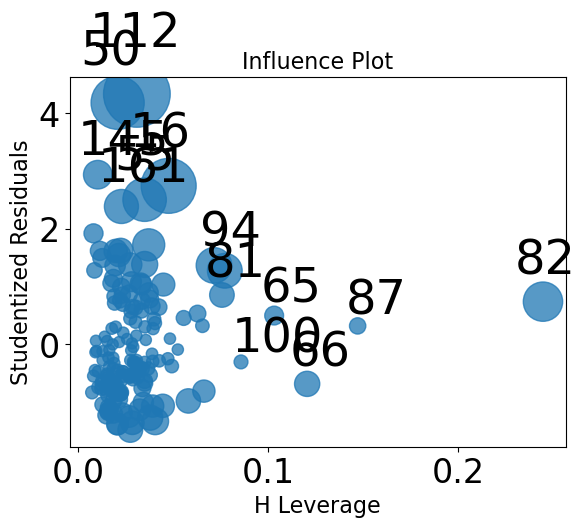

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

y = np.array(retained_data.iloc[:, 0], dtype=float).reshape(-1, 1)
X = np.array(retained_data.iloc[:, [1,2,3,4,5]], dtype=float)

model = sm.OLS(y,X)
results = model.fit()
# print(results.summary()) # donne info F statistique, Rsquared...

influence_plot(results, criterion="cooks")

plt.savefig("Influence_plot.png")

plt.show()



### nettoyage des Outliers

In [27]:
# outliers droping
index = [112, 50, 145, 16, 55, 161, 94, 81, 65, 66, 100, 87, 82]
display(retained_data.iloc[index])
outliers = retained_data.iloc[index]
retained_data_clean = retained_data.reset_index().drop(index) #.set_index("Zone")

ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
Zone                                                                          
Pays-Bas                2.500000           57141.4                 0.715123   
Gambie                  2.333333            2206.9                 8.508772   
Timor-Leste             1.800000            3123.1                 5.678233   
Belgique                1.870370           51707.8                 1.689601   
Guinée                  1.592593            2564.0                 7.910424   
Îles Salomon            1.666667            2367.4                 7.656968   
Mongolie                1.333333           12309.8                 5.425868   
Lituanie                0.542169           36974.9                -4.676901   
Irlande                 0.833333           86781.4                 3.465449   
Islande                 0.100000           55873.9                 2.077151   
Niger                   0.080000            1219.1                10.876443   
Maldives                1.083333           18914.3                11.821705   
Luxembourg              1.090909          114482.0                 6.125828   

              taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
Zone                                                                          
Pays-Bas                  0.655678                                 38.86155   
Gambie                    0.256453                                 23.89655   
Timor-Leste               0.293671                                 21.16635   
Belgique                  0.587639                                 36.37955   
Guinée                    0.198187                                 20.94005   
Îles Salomon              0.289290                                 19.39245   
Mongolie                  0.651277                                 31.86085   
Lituanie                  0.623271                                 46.17615   
Irlande                   0.613027                                 42.86925   
Islande                   0.716685                                 53.46520   
Niger                     0.141231                                 30.13440   
Maldives                  0.604433                                 29.63800   
Luxembourg                0.622899                                 39.52950   

              millions_de_kcal_par_habitant_par_an  cluster  
Zone                                                         
Pays-Bas                                  2.384545        3  
Gambie                                    1.852740        1  
Timor-Leste                               1.660020        1  
Belgique                                  2.761590        3  
Guinée                                    1.991440        1  
Îles Salomon                              1.746890        1  
Mongolie                                  1.845805        5  
Lituanie                                  2.478350        3  
Irlande                                   2.775095        3  
Islande                                   2.631650        3  
Niger                                     1.851280        1  
Maldives                                  1.693965        2  
Luxembourg                                2.532370        3

## Cercle de Corrélation 
### mise en place d'une méthode d'affichage

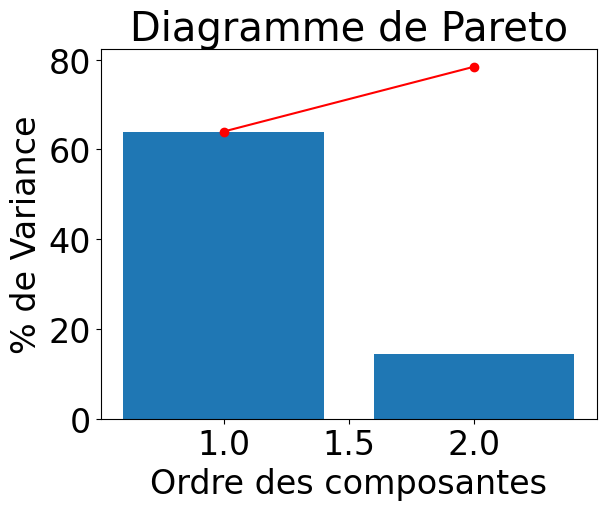

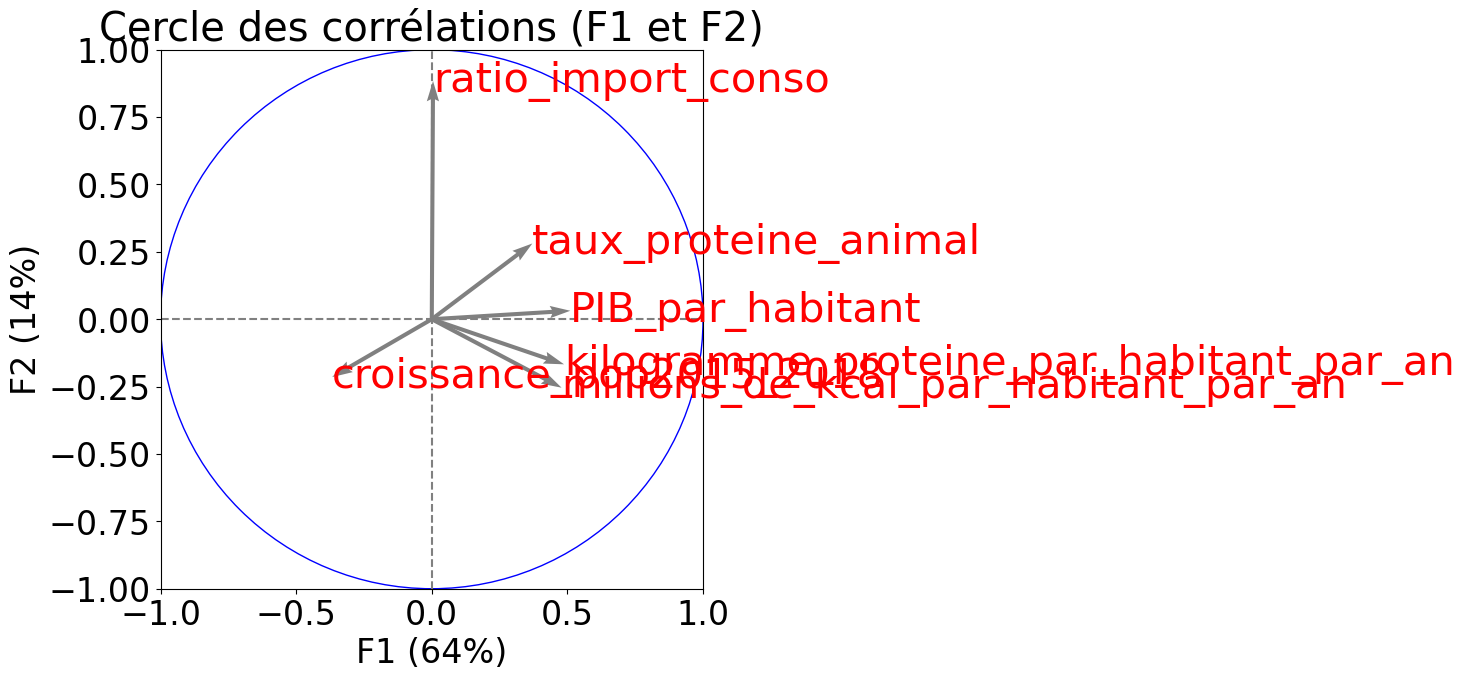

ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
1            0.004623          0.510827                -0.367281   
2            0.883997          0.031388                -0.214590   

   taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
1              0.370726                                 0.487664   
2              0.281050                                -0.167320   

   millions_de_kcal_par_habitant_par_an  
1                              0.478420  
2                             -0.254028

In [28]:
def pca_pareto_diagram_corr_circle(matrix):
    
    # data compression + pca projection
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import RobustScaler

    scaler = RobustScaler().fit_transform(matrix)

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(scaler)
    
#     pareto diagram
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Ordre des composantes")
    plt.ylabel("% de Variance")
    plt.title("Diagramme de Pareto")
    plt.show(block=False)
    
    
    display_circles(pca.components_, 2, pca, [(0,1)], labels = np.array(matrix.columns))
#     display_circles(pca.components_, 3, pca, [(2,1)], labels = np.array(matrix.columns))
#     display_circles(pca.components_, 3, pca, [(0,2)], labels = np.array(matrix.columns))
    return pd.DataFrame(pca.components_, columns=matrix.columns, index=np.arange(1, pca.components_.shape[0]+1))
    

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='30', ha='left', va='center', rotation=label_rotation, color="red")
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, int(round(100*pca.explained_variance_ratio_[d1],0))))
            plt.ylabel('F{} ({}%)'.format(d2+1, int(round(100*pca.explained_variance_ratio_[d2],0))))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)    
    
    
    
    
pca_pareto_diagram_corr_circle(retained_data_clean.iloc[:, [1, 2, 3, 4, 5, 6]])


## Analyse des corrélations (Pearson) entre les variables

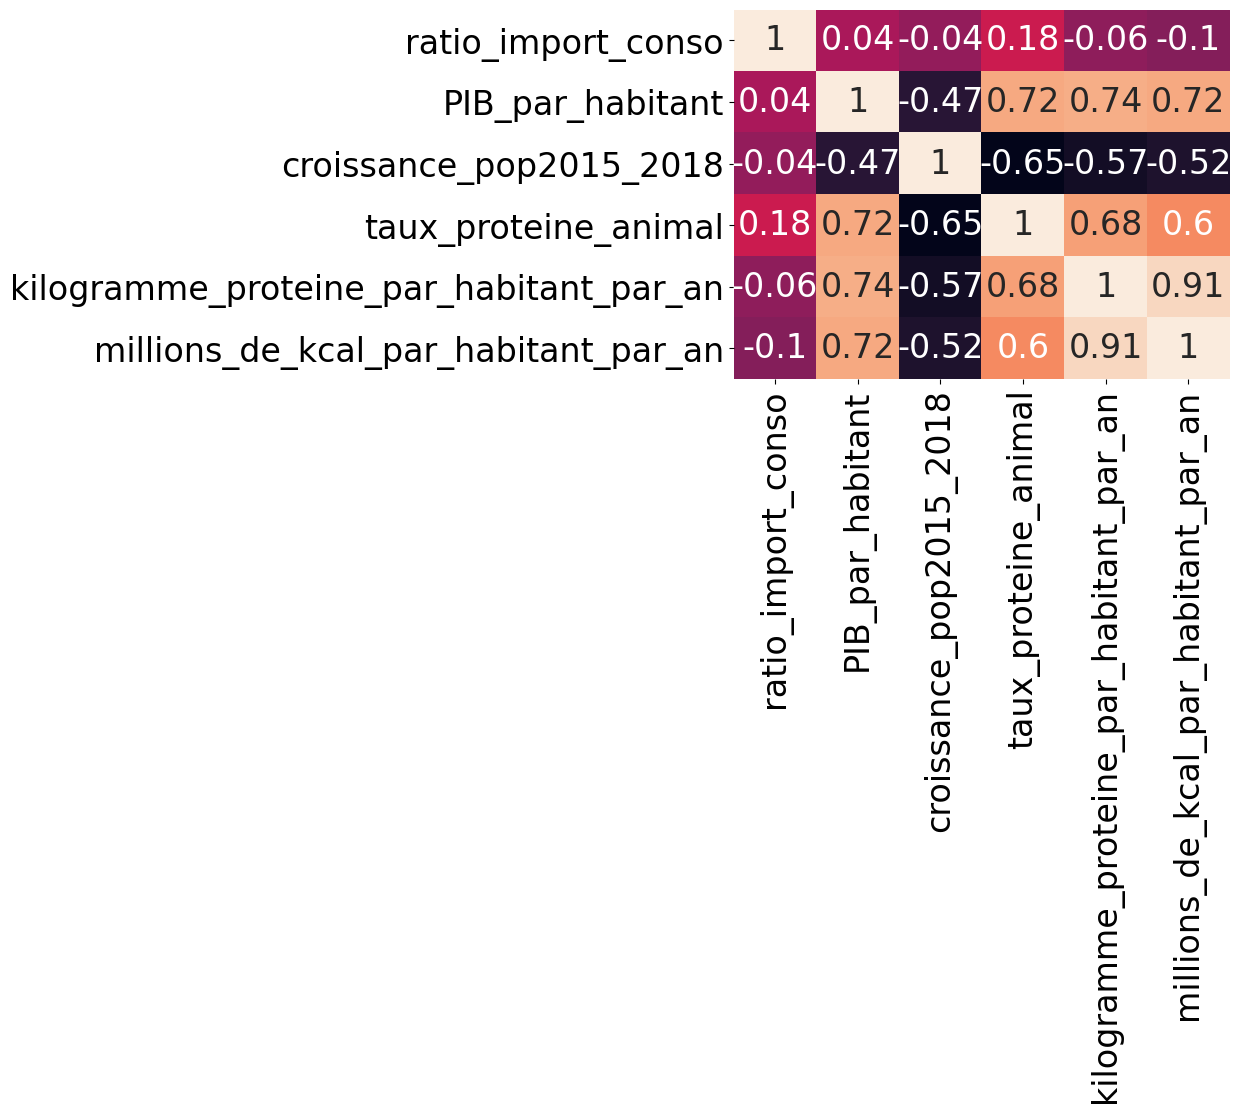

In [29]:
pearson_data = retained_data_clean.reset_index().drop(columns=['Zone']).astype('float')
sns.heatmap(pearson_data.iloc[:, 1:7].corr().round(2), annot=True, cbar=False);


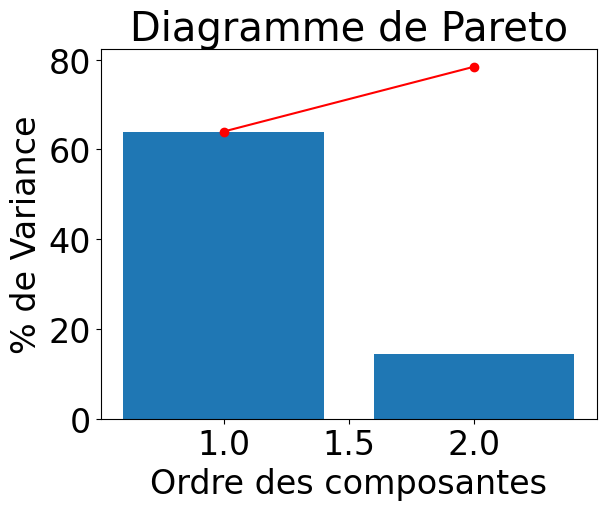

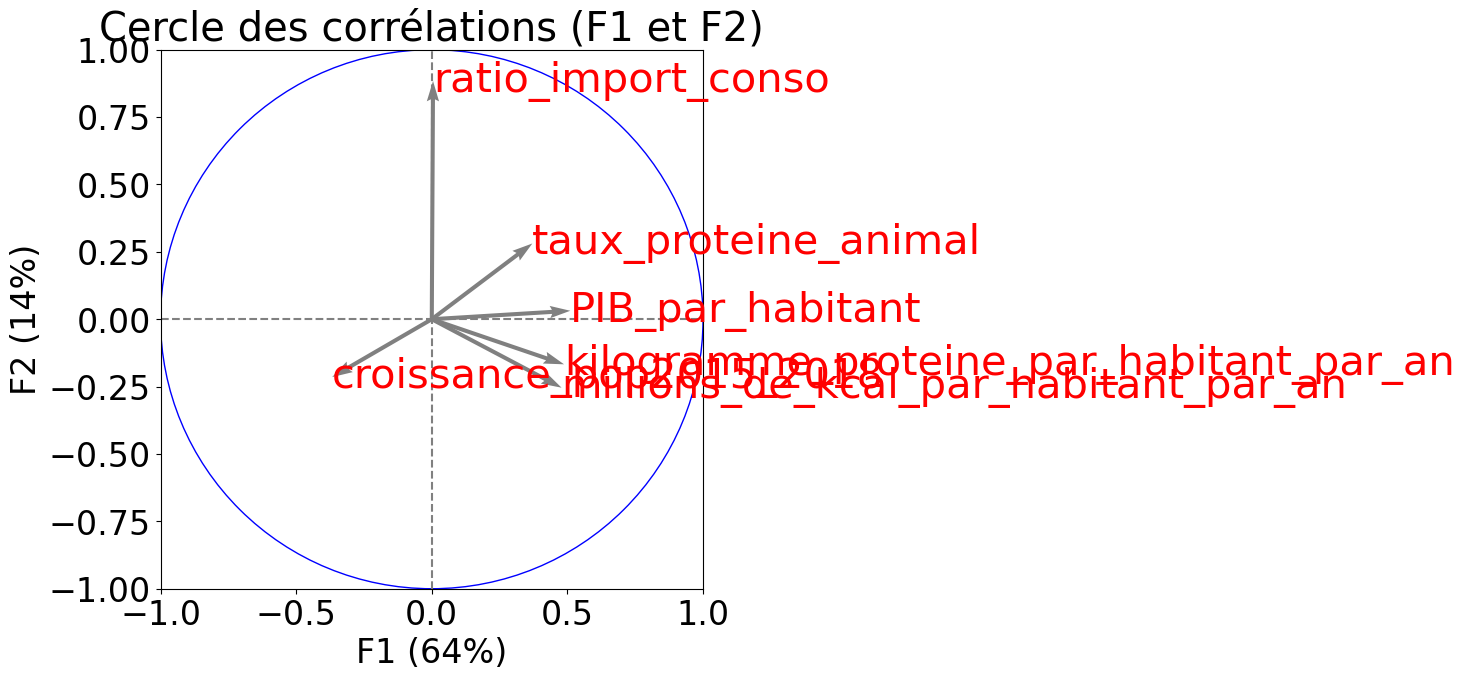

ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
1            0.004623          0.510827                -0.367281   
2            0.883997          0.031388                -0.214590   

   taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
1              0.370726                                 0.487664   
2              0.281050                                -0.167320   

   millions_de_kcal_par_habitant_par_an  
1                              0.478420  
2                             -0.254028

In [30]:
from sklearn.preprocessing import RobustScaler

matrix = pca_pareto_diagram_corr_circle(retained_data_clean.set_index("Zone").iloc[:, [0, 1, 2, 3, 4, 5]])

scaler = RobustScaler().fit_transform(matrix)

pca = PCA(n_components=0.75)
X_reduced = pca.fit_transform(scaler)
matrix




### Calcul des coordonnées factoriel pour chaque observation (Pays)

In [31]:
from sklearn.preprocessing import RobustScaler
standardized_data = RobustScaler().fit_transform(retained_data_clean.set_index("Zone"))


CTR = (pd.DataFrame({'id':retained_data.drop(columns = "cluster").columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))
COS = (pd.DataFrame({'id':retained_data.drop(columns = "cluster").columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}))

retained_data_clean['F1Cal'] = standardized_data[:, 0] * COS.iloc[0, 1] + standardized_data[:, 1] * COS.iloc[1, 1]   + standardized_data[:, 2] * COS.iloc[2, 1] + standardized_data[:, 3] * COS.iloc[3, 1]  + standardized_data[:, 4] * COS.iloc[4, 1]  + standardized_data[:, 5] * COS.iloc[5, 1]   
retained_data_clean['F2Cal'] = standardized_data[:, 0] * COS.iloc[0, 2]  + standardized_data[:, 1] * COS.iloc[1, 2]  + standardized_data[:, 2] * COS.iloc[2, 2] + standardized_data[:, 3] * COS.iloc[3, 2]   + standardized_data[:, 4] * COS.iloc[4, 2]  + standardized_data[:, 5] * COS.iloc[5, 2] 




F1 = standardized_data[:, 1] * matrix.iloc[0, 0] + standardized_data[:, 2] * matrix.iloc[0, 1] + standardized_data[:, 3] * matrix.iloc[0, 2] + standardized_data[:, 4] * matrix.iloc[0, 3] + standardized_data[:, 5] * matrix.iloc[0, 4] + standardized_data[:, 6] * matrix.iloc[0, 5]
F2 = standardized_data[:, 1] * matrix.iloc[1, 0] + standardized_data[:, 2] * matrix.iloc[1, 1] + standardized_data[:, 3] * matrix.iloc[1, 2] + standardized_data[:, 4] * matrix.iloc[1, 3] + standardized_data[:, 5] * matrix.iloc[1, 4] + standardized_data[:, 6] * matrix.iloc[1, 5]

retained_data_clean['F1V'] = F1
retained_data_clean['F2V'] = F2



retained_data_clean

Zone  ratio_import_conso  PIB_par_habitant  \
0              Afghanistan            0.471698            2202.3   
1           Afrique du Sud            0.231149           12481.8   
2                  Albanie            0.444444           13961.8   
3                  Algérie            0.000000           11349.7   
4                Allemagne            0.522809           53815.4   
..                     ...                 ...               ...   
156                 Égypte            0.026901           11763.2   
157    Émirats arabes unis            1.004950           67119.1   
158               Équateur            0.000000           11375.3   
159  États-Unis d'Amérique            0.006865           62682.8   
160               Éthiopie            0.013333            2219.7   

     croissance_pop2015_2018  taux_proteine_animal  \
0                   7.419563              0.194414   
1                   4.164864              0.427166   
2                  -0.277489              0.533760   
3                   5.920242              0.269222   
4                   1.608440              0.608940   
..                       ...                   ...   
156                 6.076770              0.270797   
157                 3.820995              0.458137   
158                 5.104191              0.466181   
159                 1.900971              0.646857   
160                 7.680546              0.098899   

     kilogramme_proteine_par_habitant_par_an  \
0                                   20.25750   
1                                   30.79505   
2                                   42.21955   
3                                   33.51430   
4                                   38.37975   
..                                       ...   
156                                 35.58385   
157                                 40.19380   
158                                 24.06810   
159                                 41.45670   
160                                 24.21045   

     millions_de_kcal_par_habitant_par_an  cluster     F1Cal     F2Cal  \
0                                1.488470        1 -0.611318  0.260471   
1                                2.130505        4  0.078391  0.009842   
2                                2.424695        3  0.422709  0.317588   
3                                2.444405        4  0.206805 -0.296903   
4                                2.599165        3  0.876913  0.463024   
..                                    ...      ...       ...       ...   
156                              2.434550        4  0.256596 -0.258992   
157                              2.454625        3  0.919118  1.085846   
158                              1.909315        2 -0.122580 -0.302125   
159                              2.740420        3  1.122250 -0.194439   
160                              1.684110        1 -0.498446 -0.342101   

          F1V       F2V  
0   -0.617779  0.016397  
1    0.448998 -0.123907  
2    0.277508  0.140187  
3    1.259841 -0.070576  
4    0.432462  1.467464  
..        ...       ...  
156  1.335186  0.002047  
157  0.790775  2.209560  
158 -0.434560 -0.033974  
159  0.662539  1.811342  
160 -0.128581  0.128040  

[149 rows x 12 columns]

# Classification des pays avec les valeurs initials
## dendrogramme

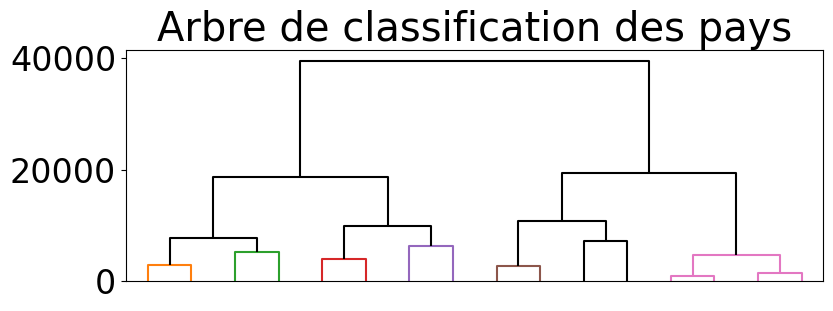

In [32]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

plt.figure(figsize=(9,3))
plt.title('Arbre de classification des pays')

linkage_matrix = linkage(retained_data_clean.iloc[:, 1:7], method='median', metric='euclidean', optimal_ordering=True)


dendrogram(linkage_matrix,
           no_labels=True,
           truncate_mode='level', p=3,
           color_threshold=7000,
           show_leaf_counts=True,
           above_threshold_color='black')

plt.savefig('P5_01_dendrogramme.png')
plt.show()

## Cluster et centroïde

In [33]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage


groups = fcluster(linkage_matrix, criterion='maxclust', t=7, depth=2)

retained_data_clean['group'] = groups.reshape(-1,1)
# retained_data_clean.iloc[:,10].sort_values().to_csv('P5_03_groupes.csv')


centroids = retained_data_clean.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]].groupby('group').mean().round(2)

centroids = pd.DataFrame(centroids,
                         index=retained_data_clean.groupby('group').mean().index,
                         columns=list(retained_data_clean.iloc[:, [ 1, 2, 3, 4, 5, 6, 10, 11]].columns))

centroids.to_csv('P5_04_centroïdes_Valeur_init.csv')

centroids






ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
group                                                                  
1                    0.38           3282.17                     6.47   
2                    0.36          11527.34                     3.13   
3                    0.36          20386.49                     1.71   
4                    0.50          30397.56                     1.45   
5                    0.28          41232.38                     1.22   
6                    0.43          50696.08                     2.78   
7                    0.34          65515.70                     2.75   

       taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
group                                                                  
1                      0.27                                    22.58   
2                      0.40                                    29.10   
3                      0.53                                    30.84   
4                      0.56                                    34.23   
5                      0.56                                    36.97   
6                      0.58                                    38.72   
7                      0.58                                    39.44   

       millions_de_kcal_par_habitant_par_an   F1V   F2V  
group                                                    
1                                      1.77 -0.33 -0.10  
2                                      2.08  0.07 -0.07  
3                                      2.13  0.06  0.08  
4                                      2.28  0.19  0.51  
5                                      2.36  0.31  0.99  
6                                      2.50  0.52  1.41  
7                                      2.53  0.68  1.93

In [34]:
short_list = retained_data_clean[retained_data_clean['group']==6][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]

short_list


Zone  ratio_import_conso  \
4                                            Allemagne            0.522809   
7                                      Arabie saoudite            0.542833   
10                                           Australie            0.013212   
11                                            Autriche            0.647727   
29                                              Canada            0.118158   
38                                            Danemark            0.909677   
46                                            Finlande            0.147826   
47                                              France            0.328607   
76                                              Koweït            0.735000   
118  Royaume-Uni de Grande-Bretagne et d'Irlande du...            0.376703   
139                                              Suède            0.428571   

     PIB_par_habitant  croissance_pop2015_2018  taux_proteine_animal  \
4             53815.4                 1.608440              0.608940   
7             46962.1                 5.889683              0.376755   
10            49756.3                 3.875813              0.667926   
11            56352.4                 2.384434              0.603576   
29            49031.4                 2.826703              0.543487   
38            57184.2                 1.095271              0.681395   
46            48621.1                 0.760456              0.639346   
47            46183.5                 0.859094              0.595784   
76            49846.1                 7.275804              0.494038   
118           46699.3                 1.909386              0.558274   
139           53205.1                 2.075812              0.639973   

     kilogramme_proteine_par_habitant_par_an       F1V       F2V  
4                                   38.37975  0.432462  1.467464  
7                                   31.71850  1.020264  1.181789  
10                                  38.63525  0.479800  1.329191  
11                                  39.80325  0.658044  1.581685  
29                                  38.10600  0.589865  1.353212  
38                                  42.70865  0.287153  1.697132  
46                                  43.06270  0.292617  1.416305  
47                                  39.47840  0.357283  1.224152  
76                                  37.64975  1.100878  1.446896  
118                                 37.89430  0.371899  1.271892  
139                                 38.51480  0.166435  1.521876

## Projection des groupes de pays dans le plan factoriel
### mise en place d'une méthode

In [35]:
def factorial_plane(matrix, groups, labels, centroids):
    
    names = matrix.index
    
    # data compression + pca projection
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler().fit_transform(matrix)
    pca = PCA(n_components=2)
    matrix = pca.fit_transform(scaler)
               
    # affichage des points
    fig = plt.figure(figsize=(7,7))
    
    plt.scatter(matrix[:, 0], matrix[:, 1], alpha=1, c=groups, cmap='Set2')  
    
    # centroids visual
    if centroids:
        centroids = np.concatenate([matrix,np.array(groups).reshape(-1, 1)], axis=1)
        centroids = pd.DataFrame(centroids).groupby(2).mean().round(2)
        
        # red dots
        plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='r', alpha=0.7)
        
        # text
        [plt.text(x=centroids.iloc[i, 0], 
                  y=centroids.iloc[i, 1], 
                  s=int(centroids.index[i]), 
                  c='r',
                  fontsize=20) for i in np.arange(0, centroids.shape[0])];
                
    # détermination des limites du graphique
    x_max = np.max(matrix[:, 0])* 1.1
    y_max = np.max(matrix[:, 1])* 1.1
    plt.xlim([-x_max,x_max])
    plt.ylim([-x_max,x_max])
    
    # naming dots
    if labels:
        [plt.text(x=matrix[i, 0], 
                  y=matrix[i, 1], 
                  s=names[i], 
                  c='r',
                  fontsize=8, alpha=0.7) for i in np.arange(0, names.shape[0])];
    
        
    # affichage des lignes horizontales et verticales
    plt.plot([-100, 100], [0, 0], color='grey', ls='--', alpha=0.3)
    plt.plot([0, 0], [-100, 100], color='grey', ls='--', alpha=0.3)

    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F1 ({}%)'.format(int(round(100*pca.explained_variance_ratio_[0],0))))
    plt.ylabel('F2 ({}%)'.format(int(round(100*pca.explained_variance_ratio_[1],0))))

    plt.title("Projection des groupes de pays")
    plt.show(block=False)

## Projection des groupes de pays determiner par les valeurs initiales

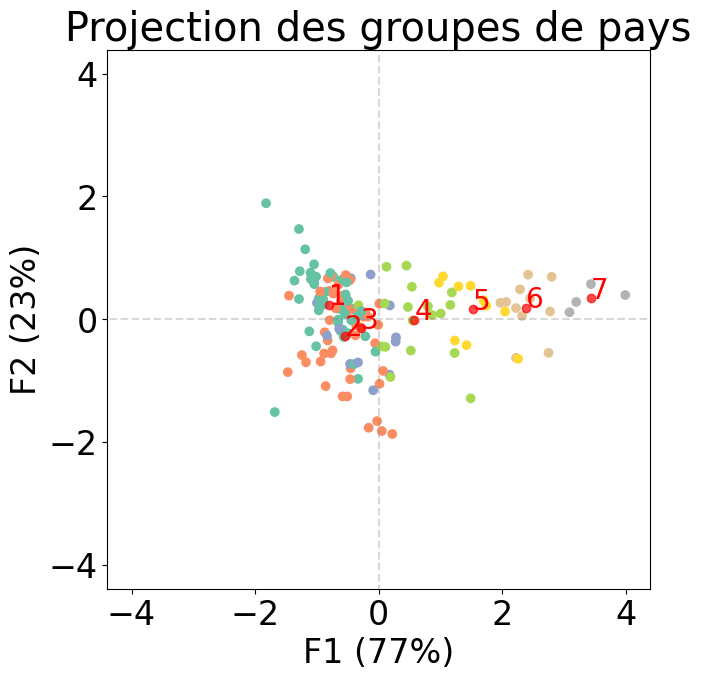

In [36]:
factorial_plane(retained_data_clean.iloc[:, [10, 11]], list(retained_data_clean.iloc[:,12]), labels=False, centroids=True)


Problème : on peut peut voir que les différents groupes ne sont pas rassembler de manière interréssante pour cibler des pays importateur de poulet.

Solution : Réaliser les groupes en utilisant les coordonnées sur le plan factoriel

## Projection des groupes de pays determiner par leurs coordonnées sur le plan factoriel


In [37]:
# #t calculer la qualité de représentation des variables en montant la corrélation au carré :
# cos2var = corvar**2
# print(pd.DataFrame({'id':retained_data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}))

# # La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe
# ctrvar = cos2var
# for k in range(p):
#  ctrvar[:,k] = ctrvar[:,k]/eigval[k]
# #on n'affiche pour tout les axes, mais seul les deux premiers sont intéréssant pour un représentation 2D
# print(pd.DataFrame({'id':retained_data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))
# cos2var = corvar**2
# CTR = (pd.DataFrame({'id':retained_data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))
# COS = (pd.DataFrame({'id':retained_data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}))


# standardized_data = RobustScaler().fit_transform(retained_data_clean.set_index("Zone"))
# retained_data_clean['F1Bis'] = standardized_data[:, 0] * COS.iloc[0, 1] * CTR.iloc[0, 1]  + standardized_data[:, 1] * COS.iloc[1, 1] * CTR.iloc[1, 1]  + standardized_data[:, 2] * COS.iloc[2, 1] * CTR.iloc[2, 1]  + standardized_data[:, 3] * COS.iloc[3, 1] * CTR.iloc[3, 1]  + standardized_data[:, 4] * COS.iloc[4, 1] * CTR.iloc[4, 1]  + standardized_data[:, 5] * COS.iloc[5, 1] * CTR.iloc[5, 1]  
# retained_data_clean['F2Bis'] = standardized_data[:, 0] * COS.iloc[0, 2] * CTR.iloc[0, 2]  + standardized_data[:, 1] * COS.iloc[1, 2] * CTR.iloc[1, 2]  + standardized_data[:, 2] * COS.iloc[2, 2] * CTR.iloc[2, 2]  + standardized_data[:, 3] * COS.iloc[3, 2] * CTR.iloc[3, 2]  + standardized_data[:, 4] * COS.iloc[4, 2] * CTR.iloc[4, 2]  + standardized_data[:, 5] * COS.iloc[5, 2] * CTR.iloc[5, 2]

# retained_data_clean[retained_data_clean["Zone"] == "France"]



### Réalisation des nouveaux groupes de pays

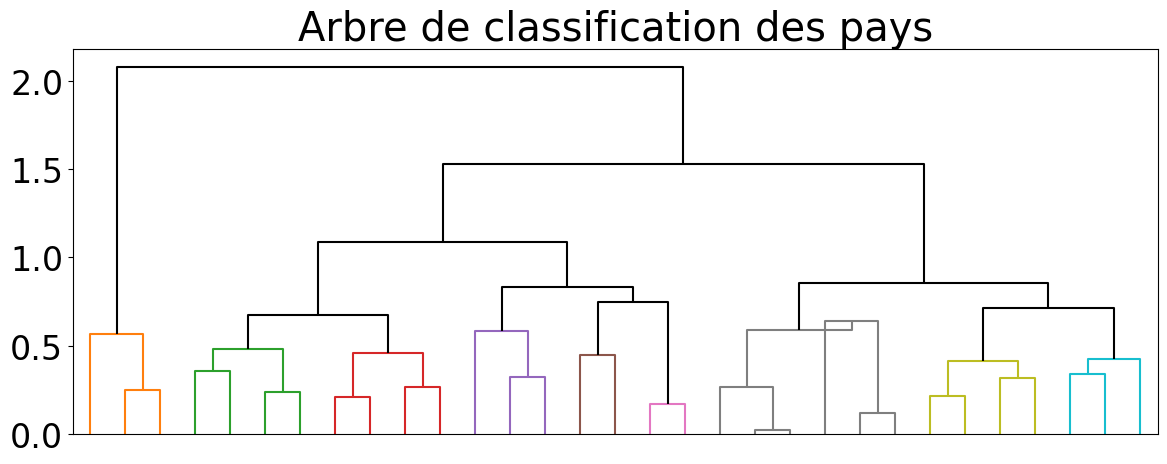

In [38]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

plt.figure(figsize=(14,5))
plt.title('Arbre de classification des pays')

linkage_matrix = linkage(retained_data_clean.iloc[:, [10, 11]], method='median', metric='euclidean', optimal_ordering=True)

dendrogram(linkage_matrix,
           no_labels=True,
           truncate_mode='level', p=5,
           color_threshold=0.65,
           show_leaf_counts=True,
           above_threshold_color='black')

plt.savefig('P5_02_dendrogrammeF1F2.png')
plt.show()



### Détermination des centroïdes

In [39]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage


groups = fcluster(linkage_matrix, criterion='maxclust', t=9, depth=2)

retained_data_clean['group'] = groups.reshape(-1,1)
# retained_data_clean.iloc[:,10].sort_values().to_csv('P5_03_groupes.csv')


centroids = retained_data_clean.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]].groupby('group').mean().round(2)

centroids = pd.DataFrame(centroids,
                         index=retained_data_clean.groupby('group').mean().index,
                         columns=list(retained_data_clean.iloc[:, [ 1, 2, 3, 4, 5, 6, 10, 11]].columns))

centroids.to_csv('P5_04_centroïdesF1F2.csv')



retained_data_clean.to_csv(path_or_buf="data_cluster.csv") # crée fichier CSV avec Dataframe

centroids.rename(columns={"croissance_pop2015_2018": "croissance", "taux_proteine_animal": "% proteïne animal", "kilogramme_proteine_par_habitant_par_an": "Protéine ", "millions_de_kcal_par_habitant_par_an": "KCal"})

ratio_import_conso  PIB_par_habitant  croissance  % proteïne animal  \
group                                                                        
1                    0.54           1836.57        3.96               0.31   
2                    0.50          31408.43        0.43               0.55   
3                    0.38           8027.02        4.80               0.33   
4                    0.55          10737.10        1.89               0.49   
5                    0.28          16122.70        4.04               0.46   
6                    0.01          10345.80        4.78               0.28   
7                    0.40          39352.29        5.62               0.48   
8                    0.34          48446.40        1.54               0.60   
9                    0.40          63683.04        2.68               0.59   

       Protéine   KCal   F1V   F2V  
group                               
1          16.82  1.41 -1.34 -0.17  
2          34.03  2.26 -0.07  0.63  
3          24.18  1.85 -0.34 -0.03  
4          29.00  2.07  0.15 -0.36  
5          32.70  2.21  0.48  0.04  
6          35.59  2.47  1.22 -0.08  
7          36.41  2.41  0.91  0.98  
8          39.51  2.49  0.37  1.34  
9          39.51  2.56  0.68  1.86

In [40]:
short_listF1F2 = retained_data_clean[retained_data_clean['group']==8][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]

short_listF1F2.head(60)

Zone  ratio_import_conso  \
4                                            Allemagne            0.522809   
10                                           Australie            0.013212   
29                                              Canada            0.118158   
38                                            Danemark            0.909677   
46                                            Finlande            0.147826   
47                                              France            0.328607   
68                                              Italie            0.080965   
89                                               Malte            0.642857   
118  Royaume-Uni de Grande-Bretagne et d'Irlande du...            0.376703   
121                                République de Corée            0.196532   
139                                              Suède            0.428571   

     PIB_par_habitant  croissance_pop2015_2018  taux_proteine_animal  \
4             53815.4                 1.608440              0.608940   
10            49756.3                 3.875813              0.667926   
29            49031.4                 2.826703              0.543487   
38            57184.2                 1.095271              0.681395   
46            48621.1                 0.760456              0.639346   
47            46183.5                 0.859094              0.595784   
68            42412.7                 0.080822              0.534799   
89            43340.2                 1.138952              0.567818   
118           46699.3                 1.909386              0.558274   
121           42661.2                 0.682014              0.516529   
139           53205.1                 2.075812              0.639973   

     kilogramme_proteine_par_habitant_par_an       F1V       F2V  
4                                   38.37975  0.432462  1.467464  
10                                  38.63525  0.479800  1.329191  
29                                  38.10600  0.589865  1.353212  
38                                  42.70865  0.287153  1.697132  
46                                  43.06270  0.292617  1.416305  
47                                  39.47840  0.357283  1.224152  
68                                  38.86155  0.331028  1.106876  
89                                  42.46410  0.471817  1.234347  
118                                 37.89430  0.371899  1.271892  
121                                 36.54745  0.260696  1.102571  
139                                 38.51480  0.166435  1.521876

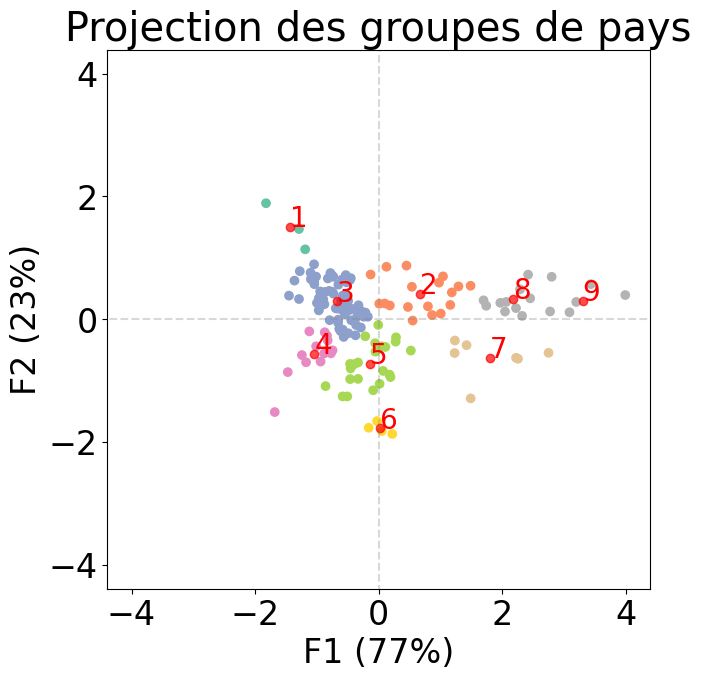

<Figure size 640x480 with 0 Axes>

In [41]:
factorial_plane(retained_data_clean.iloc[:, [10, 11]], list(retained_data_clean.iloc[:,12]), labels=False, centroids=True)
plt.savefig('Graph/Groupe_pays_ACP.png')

# Test d'adéquation pour determiner les variables qui suivent une loi normal
## mise en place d'une méthode d'indentification de loi normal

In [42]:
from scipy import stats
def ks_shapiro_jb(vector):
    
    critical_threshold = 0.001
    shapiro_ok = False
    ks_ok = False
    jb_ok = False
    
    X = vector.values.reshape(-1,1)
    standardized_X = RobustScaler().fit_transform(X)
    
#     shapiro test
    echantillon_standardized_X = np.random.choice(standardized_X.reshape(-1), size=30, replace=False)

    if stats.shapiro(echantillon_standardized_X)[1] >= critical_threshold:
        shapiro_ok = True
        
#     kolmogorov/smirnov test
# The one-sample test performs a test of the distribution F(x) of an observed random variable against 
# a given distribution G(x). Under the null hypothesis, the two distributions are identical, F(x)=G(x). 

    random_normal = np.random.normal(loc=standardized_X.mean(), 
                                     scale=standardized_X.std(), 
                                     size=(standardized_X.shape[0], 1))

    if stats.kstest(standardized_X.reshape(-1), random_normal.reshape(-1), 
                    N=standardized_X.shape[0])[1] >= critical_threshold :
        ks_ok = True

#   test de jarque bera 
# Note that this test only works for a large enough number of data samples (>2000) as the test statistic 
# asymptotically has a Chi-squared distribution with 2 degrees of freedom.

    if stats.jarque_bera(standardized_X.reshape(-1))[1] >= critical_threshold:
        jb_ok = True

    if (shapiro_ok==True) & (ks_ok==True) & (jb_ok==True): 
        return True
    else :
        return False

ks_shapiro_jb(retained_data_clean.set_index("Zone").iloc[:, 4])

True


Mise en place d'une boucle pour tester toutes les variables, si la variable est considérer comme normal par les 3 tests ( jarque bera , kolmogorov/smirnov et shapiro) la valeur retournée sera : True


In [43]:
for i in range(len(retained_data_clean.set_index("Zone").columns)):
    print(retained_data_clean.set_index("Zone").columns[i])
    print(ks_shapiro_jb(retained_data_clean.set_index("Zone").iloc[:, i]))
    print("")

ratio_import_conso
False

PIB_par_habitant
False

croissance_pop2015_2018
True

taux_proteine_animal
True

kilogramme_proteine_par_habitant_par_an
True

millions_de_kcal_par_habitant_par_an
True

cluster
True

F1Cal
True

F2Cal
False

F1V
True

F2V
False

group
False



## Réalisation de test d'adéquation pour determiner si les différents groupes de pays ont des différence significative en fonction des variables qui suivent une loi normal (Test de Student)
### Sélection des données à comparer

In [44]:
retained_data_clean_compare = retained_data_clean.iloc[:, [1, 3, 4, 5, 6, 10, 12]] 
retained_data_clean_compare

ratio_import_conso  croissance_pop2015_2018  taux_proteine_animal  \
0              0.471698                 7.419563              0.194414   
1              0.231149                 4.164864              0.427166   
2              0.444444                -0.277489              0.533760   
3              0.000000                 5.920242              0.269222   
4              0.522809                 1.608440              0.608940   
..                  ...                      ...                   ...   
156            0.026901                 6.076770              0.270797   
157            1.004950                 3.820995              0.458137   
158            0.000000                 5.104191              0.466181   
159            0.006865                 1.900971              0.646857   
160            0.013333                 7.680546              0.098899   

     kilogramme_proteine_par_habitant_par_an  \
0                                   20.25750   
1                                   30.79505   
2                                   42.21955   
3                                   33.51430   
4                                   38.37975   
..                                       ...   
156                                 35.58385   
157                                 40.19380   
158                                 24.06810   
159                                 41.45670   
160                                 24.21045   

     millions_de_kcal_par_habitant_par_an       F1V  group  
0                                1.488470 -0.617779      3  
1                                2.130505  0.448998      5  
2                                2.424695  0.277508      5  
3                                2.444405  1.259841      6  
4                                2.599165  0.432462      8  
..                                    ...       ...    ...  
156                              2.434550  1.335186      6  
157                              2.454625  0.790775      9  
158                              1.909315 -0.434560      3  
159                              2.740420  0.662539      9  
160                              1.684110 -0.128581      3  

[149 rows x 7 columns]

### mise en place d'une méthode de comparaison deux à deux

In [45]:
def graph_compare(column_name):
    
        from scipy import stats
    

        
        # pvalue matrix creation
        nb_group = retained_data_clean_compare['group'].max() 
        
        group_list = np.arange(1, nb_group + 1)
        
        pvalue_matrix = pd.DataFrame(np.zeros((nb_group, nb_group), dtype=float), 
                                     index = group_list, 
                                     columns = group_list)
        
        for index in pvalue_matrix.index:
            for column in pvalue_matrix.columns:

                # t test : calculate pvalue : if >= 5% then print 1
                group_1 = retained_data_clean_compare[retained_data_clean_compare['group']==index][column_name]
                group_1 = group_1/group_1.std()

                group_2 = retained_data_clean_compare[retained_data_clean_compare['group']==column][column_name]
                group_2 = group_2/group_2.std()

                if stats.ttest_ind(group_1, group_2)[1] >= 0.05 :
                    pvalue_matrix.at[index, column] = 1
                    

        # visual results
        plt.title('Student Test p-value matrix' + "  " + column_name)
        sns.heatmap(pvalue_matrix, cbar=False);

#         return pvalue_matrix.astype('bool')
    
    

### comparaison de la Croissance démographique en fonction des groupes de pays

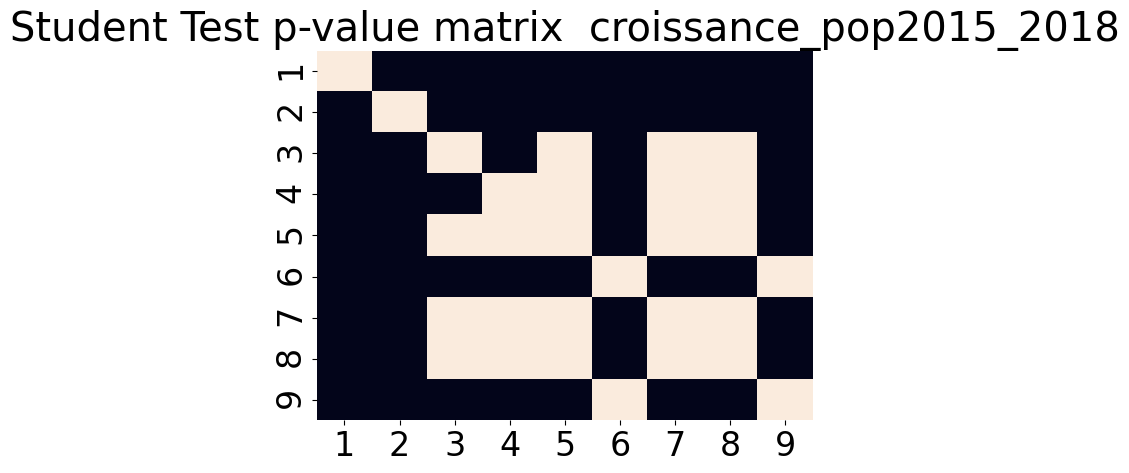

In [46]:
graph_compare("croissance_pop2015_2018")


### comparaison du taux de consomation de proteïne animal en fonction des groupes de pays

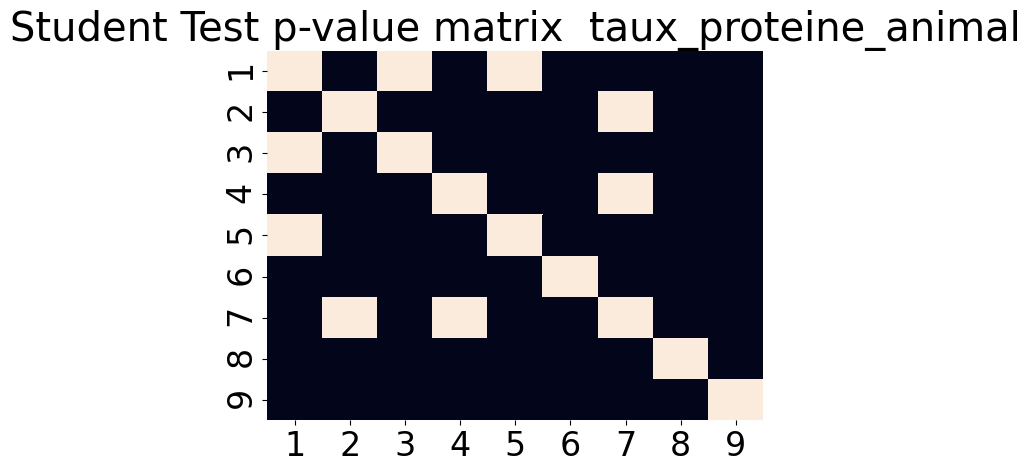

In [47]:
graph_compare("taux_proteine_animal")




### comparaison de la disponibilité alimentaire en kilogramme de proteïne par habitant par an en fonction des groupes de pays

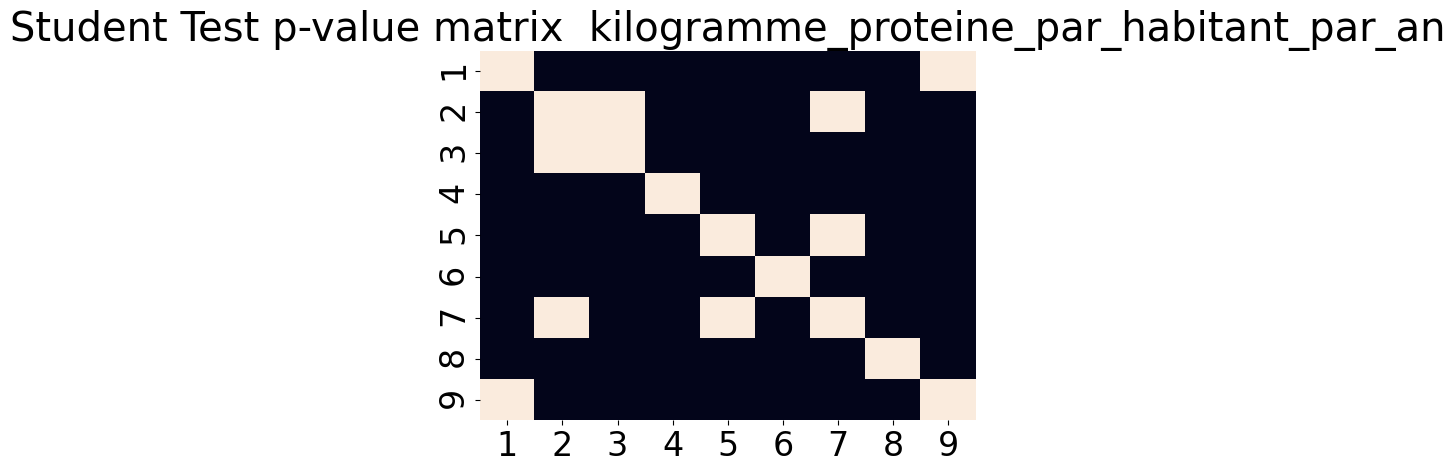

In [48]:
graph_compare("kilogramme_proteine_par_habitant_par_an")


### comparaison de la disponibilité alimentaire en kilocalorie par habitant par an en fonction des groupes de pays

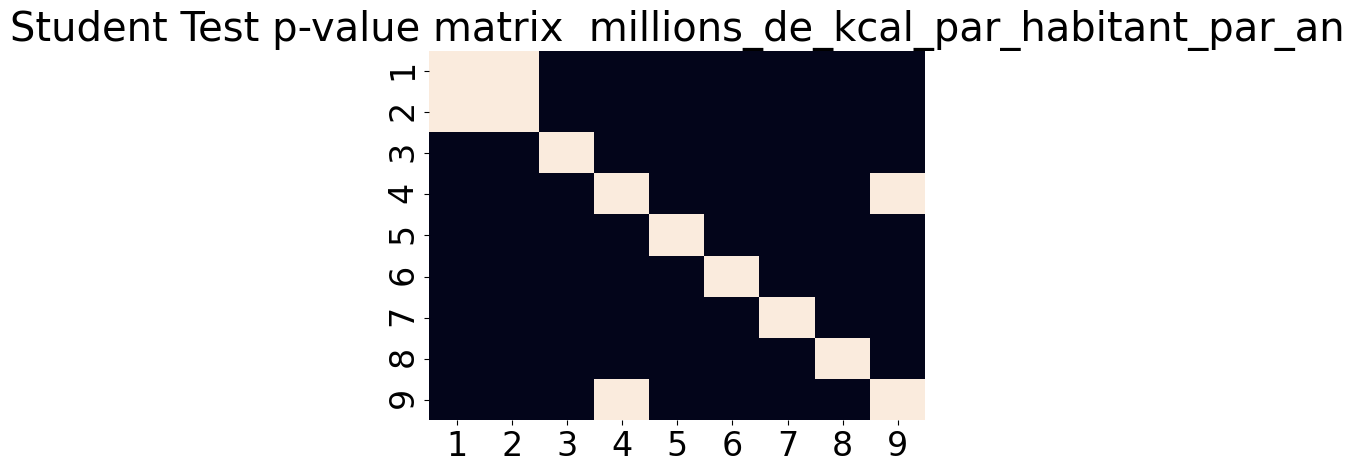

In [49]:
graph_compare("millions_de_kcal_par_habitant_par_an")


## Réalisation de test d'adéquation pour determiner si les différents groupes de pays ont des différence significative en fonction des variables qui suivent une loi normal (Test Anova)


In [50]:
def graph_compare_anova(column_name):
    
        from scipy import stats
    

        
        # pvalue matrix creation
        nb_group = retained_data_clean_compare['group'].max() 
        
        group_list = np.arange(1, nb_group + 1)
        
        pvalue_matrix = pd.DataFrame(np.zeros((nb_group, nb_group), dtype=float), 
                                     index = group_list, 
                                     columns = group_list)
        
        for index in pvalue_matrix.index:
            for column in pvalue_matrix.columns:

                # t test : calculate pvalue : if >= 5% then print 1
                group_1 = retained_data_clean_compare[retained_data_clean_compare['group']==index][column_name]
                

                group_2 = retained_data_clean_compare[retained_data_clean_compare['group']==column][column_name]
                

                if stats.f_oneway(group_1, group_2)[1] >= 0.05 :
                    pvalue_matrix.at[index, column] = 1
                    

        # visual results
        plt.title('Anova Test p-value matrix' + "  " + column_name)
        sns.heatmap(pvalue_matrix, cbar=False);

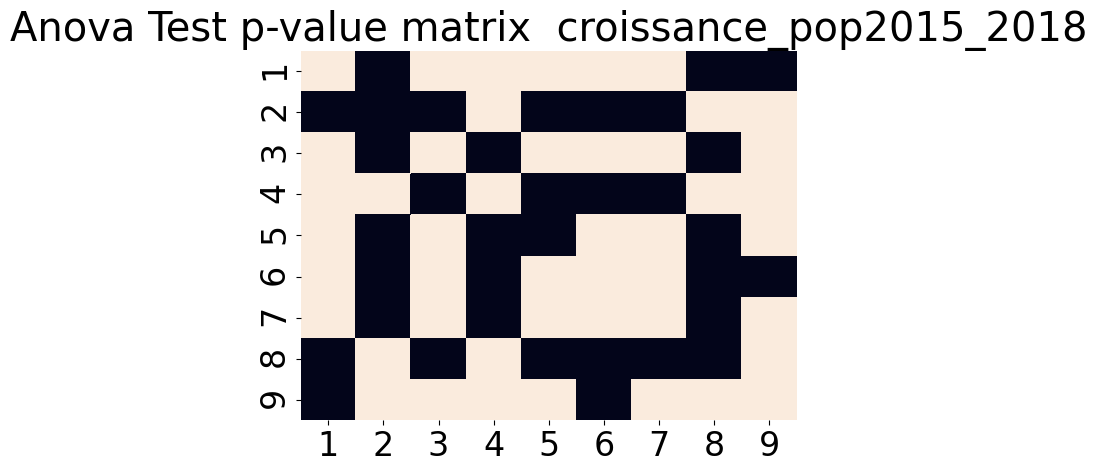

In [51]:
graph_compare_anova("croissance_pop2015_2018")

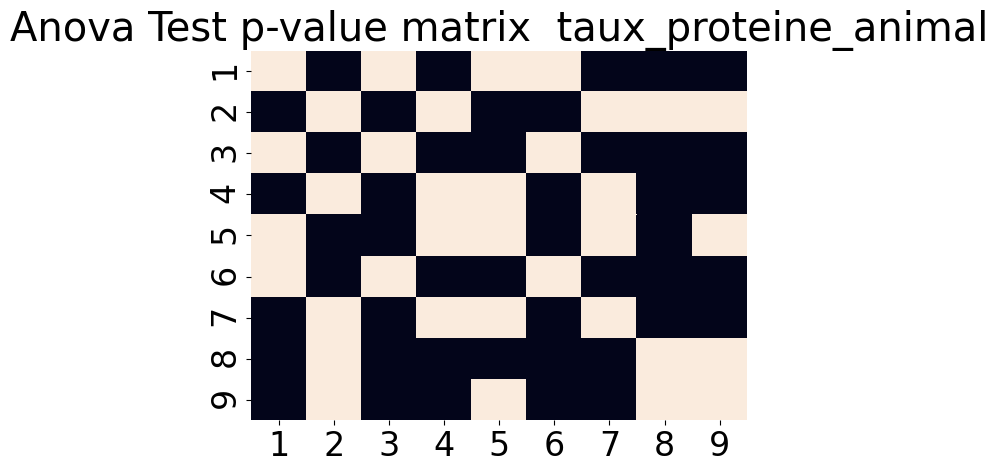

In [52]:
graph_compare_anova("taux_proteine_animal")

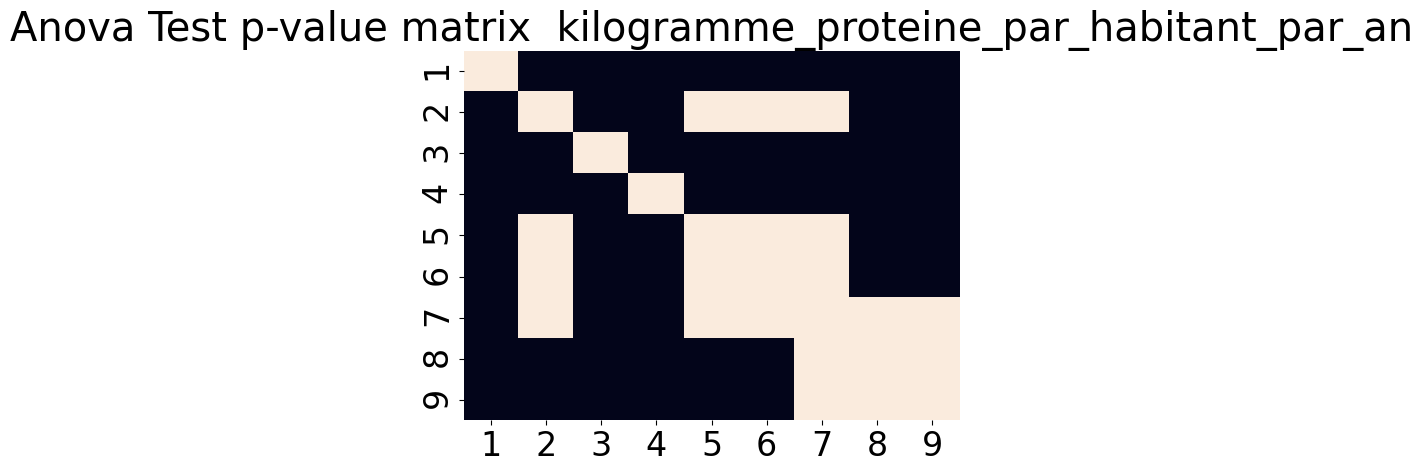

In [53]:
graph_compare_anova("kilogramme_proteine_par_habitant_par_an")

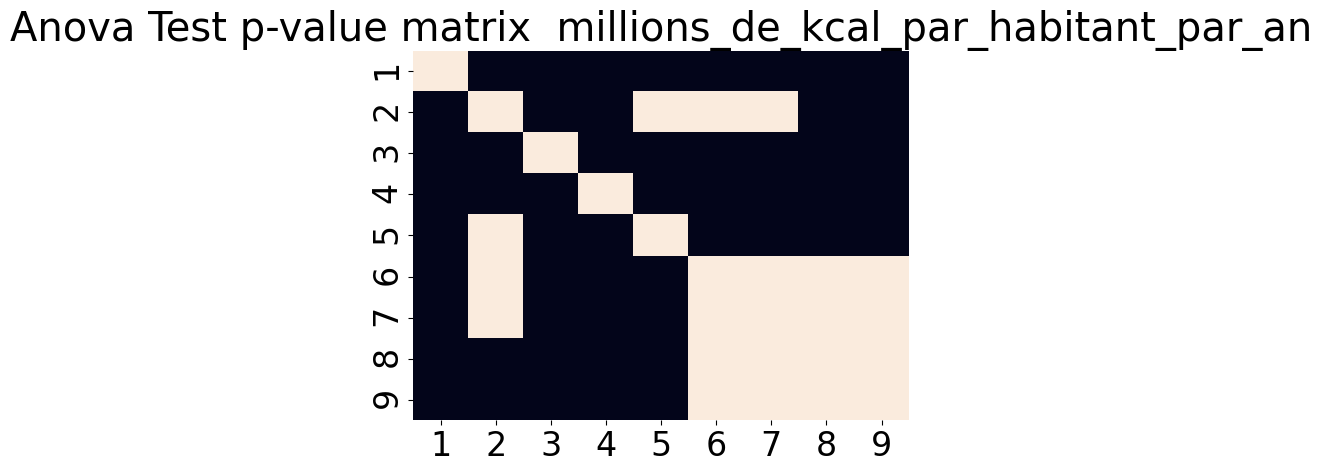

In [54]:
graph_compare_anova("millions_de_kcal_par_habitant_par_an")

### Réalisation des listes des différents pays par groupe

In [55]:
short_listF1F2_G1 = retained_data_clean[retained_data_clean['group']==1][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G2 = retained_data_clean[retained_data_clean['group']==2][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G3 = retained_data_clean[retained_data_clean['group']==3][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G4 = retained_data_clean[retained_data_clean['group']==4][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G5 = retained_data_clean[retained_data_clean['group']==5][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G6 = retained_data_clean[retained_data_clean['group']==6][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G7 = retained_data_clean[retained_data_clean['group']==7][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G8 = retained_data_clean[retained_data_clean['group']==8][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]
short_listF1F2_G9 = retained_data_clean[retained_data_clean['group']==9][["Zone", 'ratio_import_conso', 'PIB_par_habitant', "croissance_pop2015_2018", "taux_proteine_animal", "kilogramme_proteine_par_habitant_par_an", 'F1V', 'F2V']]


short_listF1F2_G9.head(60)

Zone  ratio_import_conso  PIB_par_habitant  \
11                Autriche            0.647727           56352.4   
102                Norvège            0.018018           63633.1   
137                 Suisse            0.340909           68627.8   
157    Émirats arabes unis            1.004950           67119.1   
159  États-Unis d'Amérique            0.006865           62682.8   

     croissance_pop2015_2018  taux_proteine_animal  \
11                  2.384434              0.603576   
102                 2.585238              0.599576   
137                 2.685902              0.628017   
157                 3.820995              0.458137   
159                 1.900971              0.646857   

     kilogramme_proteine_par_habitant_par_an       F1V       F2V  
11                                  39.80325  0.658044  1.581685  
102                                 41.32895  0.529713  1.977397  
137                                 34.78450  0.746751  1.728808  
157                                 40.19380  0.790775  2.209560  
159                                 41.45670  0.662539  1.811342

### Ajout d'information complémentaire pour aider à la décision du choix de groupe de pays

In [56]:
import_volaille = data_volaille[(data_volaille["Code Élément"]== 5611)]
import_volaille_clean = import_volaille[["Zone", "Valeur"]].rename(columns= {"Valeur" : "Import en millier de tonne"})
import_volaille_clean["Import en millier de tonne"] = import_volaille_clean["Import en millier de tonne"].astype('float')
import_volaille_clean["nb_pays"] = 1

centroids_clean = centroids.rename(columns={"croissance_pop2015_2018": "croissance", "taux_proteine_animal": "% proteïne animal", "kilogramme_proteine_par_habitant_par_an": "Protéine ", "millions_de_kcal_par_habitant_par_an": "KCal"})


In [57]:
Import_volaille_group = retained_data_clean[["Zone", "group"]].merge(import_volaille_clean, on = "Zone").groupby("Zone").mean().groupby("group").sum()
Import_volaille_group["importation par pays"] = Import_volaille_group["Import en millier de tonne"] / Import_volaille_group["nb_pays"]
display(Import_volaille_group.merge(centroids_clean, on = "group"))

outliers_clean = outliers.sort_values("ratio_import_conso", ascending = False).iloc[0:5]
outliers_group = outliers_clean.merge(import_volaille_clean, on = "Zone").groupby("Zone").mean().sum()
outliers_group["importation par pays"] = outliers_group["Import en millier de tonne"] / outliers_group["nb_pays"]
display(outliers_clean)
pd.DataFrame(outliers_group.T)

Import en millier de tonne  nb_pays  importation par pays  \
group                                                              
1                            95.0        3             31.666667   
2                          2389.5       18            132.750000   
3                          1991.5       65             30.638462   
4                           134.5       13             10.346154   
5                          4247.0       23            184.652174   
6                            67.5        4             16.875000   
7                          1074.0        7            153.428571   
8                          2752.0       11            250.181818   
9                           872.0        5            174.400000   

       ratio_import_conso  PIB_par_habitant  croissance  % proteïne animal  \
group                                                                        
1                    0.54           1836.57        3.96               0.31   
2                    0.50          31408.43        0.43               0.55   
3                    0.38           8027.02        4.80               0.33   
4                    0.55          10737.10        1.89               0.49   
5                    0.28          16122.70        4.04               0.46   
6                    0.01          10345.80        4.78               0.28   
7                    0.40          39352.29        5.62               0.48   
8                    0.34          48446.40        1.54               0.60   
9                    0.40          63683.04        2.68               0.59   

       Protéine   KCal   F1V   F2V  
group                               
1          16.82  1.41 -1.34 -0.17  
2          34.03  2.26 -0.07  0.63  
3          24.18  1.85 -0.34 -0.03  
4          29.00  2.07  0.15 -0.36  
5          32.70  2.21  0.48  0.04  
6          35.59  2.47  1.22 -0.08  
7          36.41  2.41  0.91  0.98  
8          39.51  2.49  0.37  1.34  
9          39.51  2.56  0.68  1.86

ratio_import_conso  PIB_par_habitant  croissance_pop2015_2018  \
Zone                                                                          
Pays-Bas                2.500000           57141.4                 0.715123   
Gambie                  2.333333            2206.9                 8.508772   
Belgique                1.870370           51707.8                 1.689601   
Timor-Leste             1.800000            3123.1                 5.678233   
Îles Salomon            1.666667            2367.4                 7.656968   

              taux_proteine_animal  kilogramme_proteine_par_habitant_par_an  \
Zone                                                                          
Pays-Bas                  0.655678                                 38.86155   
Gambie                    0.256453                                 23.89655   
Belgique                  0.587639                                 36.37955   
Timor-Leste               0.293671                                 21.16635   
Îles Salomon              0.289290                                 19.39245   

              millions_de_kcal_par_habitant_par_an  cluster  
Zone                                                         
Pays-Bas                                  2.384545        3  
Gambie                                    1.852740        1  
Belgique                                  2.761590        3  
Timor-Leste                               1.660020        1  
Îles Salomon                              1.746890        1

0
ratio_import_conso                           10.170370
PIB_par_habitant                         116546.600000
croissance_pop2015_2018                      24.248697
taux_proteine_animal                          2.082732
kilogramme_proteine_par_habitant_par_an     139.696450
millions_de_kcal_par_habitant_par_an         10.405785
cluster                                       9.000000
Import en millier de tonne                  864.500000
nb_pays                                       5.000000
importation par pays                        172.900000

In [62]:
Group = (Import_volaille_group.merge(centroids_clean, on = "group"))[["importation par pays", "PIB_par_habitant", "croissance", "% proteïne animal"]]

temp = Group.sub(Group.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs

temp = temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne

temp = temp +2

temp

temp.iloc[0]


import plotly.graph_objects as go

categories = Group.columns

fig = go.Figure()


for i in range(temp.reset_index()["group"].max()):
    fig.add_trace(go.Scatterpolar(
      r=temp.iloc[i],
      theta=categories,
      fill='toself',
      name='Groupe ' + str(i+1)))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3.8]
    )),
  showlegend=True
)

fig.show()

In [63]:
(Import_volaille_group.merge(centroids_clean, on = "group"))

Import en millier de tonne  nb_pays  importation par pays  \
group                                                              
1                            95.0        3             31.666667   
2                          2389.5       18            132.750000   
3                          1991.5       65             30.638462   
4                           134.5       13             10.346154   
5                          4247.0       23            184.652174   
6                            67.5        4             16.875000   
7                          1074.0        7            153.428571   
8                          2752.0       11            250.181818   
9                           872.0        5            174.400000   

       ratio_import_conso  PIB_par_habitant  croissance  % proteïne animal  \
group                                                                        
1                    0.54           1836.57        3.96               0.31   
2                    0.50          31408.43        0.43               0.55   
3                    0.38           8027.02        4.80               0.33   
4                    0.55          10737.10        1.89               0.49   
5                    0.28          16122.70        4.04               0.46   
6                    0.01          10345.80        4.78               0.28   
7                    0.40          39352.29        5.62               0.48   
8                    0.34          48446.40        1.54               0.60   
9                    0.40          63683.04        2.68               0.59   

       Protéine   KCal   F1V   F2V  
group                               
1          16.82  1.41 -1.34 -0.17  
2          34.03  2.26 -0.07  0.63  
3          24.18  1.85 -0.34 -0.03  
4          29.00  2.07  0.15 -0.36  
5          32.70  2.21  0.48  0.04  
6          35.59  2.47  1.22 -0.08  
7          36.41  2.41  0.91  0.98  
8          39.51  2.49  0.37  1.34  
9          39.51  2.56  0.68  1.86

### Présentation des principaux concurents dans l'exportation de poulet à l'international

In [64]:
concurent = retained_data.reset_index()

concurent[(concurent["Zone"] == "Brésil") | (concurent["Zone"] == "États-Unis d'Amérique") | (concurent["Zone"] == "Thaïlande") | (concurent["Zone"] == "Chili") | (concurent["Zone"] == "Canada") | (concurent["Zone"] == "Argentine") ]

Zone  ratio_import_conso  PIB_par_habitant  \
8                Argentine            0.006623           22034.0   
21                  Brésil            0.000304           14651.6   
29                  Canada            0.118158           49031.4   
30                   Chili            0.209150           24226.2   
144              Thaïlande            0.001955           18463.1   
159  États-Unis d'Amérique            0.006865           62682.8   

     croissance_pop2015_2018  taux_proteine_animal  \
8                   2.898943              0.646838   
21                  2.385556              0.561990   
29                  2.826703              0.543487   
30                  4.057878              0.541603   
144                 1.026963              0.427781   
159                 1.900971              0.646857   

     kilogramme_proteine_par_habitant_par_an  \
8                                   38.96375   
21                                  34.91590   
29                                  38.10600   
30                                  33.42670   
144                                 23.09720   
159                                 41.45670   

     millions_de_kcal_par_habitant_par_an  cluster  
8                                2.413745        3  
21                               2.391115        5  
29                               2.548795        3  
30                               2.192555        5  
144                              2.037795        5  
159                              2.740420        3

In [65]:
retained_data.sort_values("ratio_import_conso", ascending= False).head(25)
concurent

Zone  ratio_import_conso  PIB_par_habitant  \
0              Afghanistan            0.471698            2202.3   
1           Afrique du Sud            0.231149           12481.8   
2                  Albanie            0.444444           13961.8   
3                  Algérie            0.000000           11349.7   
4                Allemagne            0.522809           53815.4   
..                     ...                 ...               ...   
157    Émirats arabes unis            1.004950           67119.1   
158               Équateur            0.000000           11375.3   
159  États-Unis d'Amérique            0.006865           62682.8   
160               Éthiopie            0.013333            2219.7   
161           Îles Salomon            1.666667            2367.4   

     croissance_pop2015_2018  taux_proteine_animal  \
0                   7.419563              0.194414   
1                   4.164864              0.427166   
2                  -0.277489              0.533760   
3                   5.920242              0.269222   
4                   1.608440              0.608940   
..                       ...                   ...   
157                 3.820995              0.458137   
158                 5.104191              0.466181   
159                 1.900971              0.646857   
160                 7.680546              0.098899   
161                 7.656968              0.289290   

     kilogramme_proteine_par_habitant_par_an  \
0                                   20.25750   
1                                   30.79505   
2                                   42.21955   
3                                   33.51430   
4                                   38.37975   
..                                       ...   
157                                 40.19380   
158                                 24.06810   
159                                 41.45670   
160                                 24.21045   
161                                 19.39245   

     millions_de_kcal_par_habitant_par_an  cluster  
0                                1.488470        1  
1                                2.130505        4  
2                                2.424695        3  
3                                2.444405        4  
4                                2.599165        3  
..                                    ...      ...  
157                              2.454625        3  
158                              1.909315        2  
159                              2.740420        3  
160                              1.684110        1  
161                              1.746890        1  

[162 rows x 8 columns]

In [66]:
concurents = data_volaille[(data_volaille["Code Élément"]== 5911) & (data_volaille["Code année"]== 2018)].sort_values("Valeur", ascending = False).head(30)

concurents_clean = concurents[["Zone", "Valeur"]].rename(columns={"Valeur": "exportation en milliers de tonnes"})
concurents_clean.head(10)

Zone  exportation en milliers de tonnes
368                  Brésil                             4012.0
773   États-Unis d'Amérique                             3776.0
1893               Pays-Bas                             1423.0
491                   Chine                             1209.0
1941                Pologne                             1150.0
2416              Thaïlande                              870.0
66                Allemagne                              640.0
273                Belgique                              639.0
2508                Turquie                              489.0
852                  France                              474.0

In [69]:
short_listF1F2_G4.head(60)

Zone  ratio_import_conso  PIB_par_habitant  \
15                           Barbade            0.111111           15638.8   
40                         Dominique            0.800000           12155.6   
45                             Fidji            0.227273           13853.4   
57                            Guyana            0.030303            9702.6   
58                           Géorgie            0.772727           15014.3   
69                          Jamaïque            0.220779            9761.5   
75                          Kiribati            1.000000            2275.2   
97                           Myanmar            0.000619            5142.2   
127  Saint-Vincent-et-les Grenadines            0.888889           12466.2   
128                     Sainte-Lucie            0.909091           15448.8   
129                            Samoa            1.200000            6517.0   
144                        Thaïlande            0.001955           18463.1   
152                          Vanuatu            1.000000            3143.6   

     croissance_pop2015_2018  taux_proteine_animal  \
15                  0.696864              0.572679   
40                  1.388889              0.555485   
45                  1.585504              0.400197   
57                  1.540436              0.412352   
58                 -0.524607              0.407060   
69                  1.499148              0.486376   
75                  4.310345              0.490140   
97                  1.912192              0.456481   
127                 0.909091              0.561380   
128                 1.648352              0.623283   
129                 1.020408              0.592736   
144                 1.026963              0.427781   
152                 7.508532              0.427052   

     kilogramme_proteine_par_habitant_par_an       F1V       F2V  
15                                  32.51785  0.204309 -0.230414  
40                                  28.84595  0.198305 -0.449037  
45                                  25.92960  0.177588 -0.283845  
57                                  31.44110  0.178171 -0.209308  
58                                  28.02105  0.050478 -0.217086  
69                                  27.72905  0.102658 -0.459515  
75                                  26.83845  0.609663 -0.838217  
97                                  33.08725  0.066160 -0.323768  
127                                 32.79525  0.250716 -0.334938  
128                                 31.35350 -0.050753 -0.215733  
129                                 32.05795  0.229268 -0.618881  
144                                 23.09720 -0.004341 -0.208679  
152                                 23.34175 -0.124215 -0.331956